In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')

In [274]:
train_data_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S


In [275]:
columns_all = train_data_raw.columns
columns_all

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

In [276]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 891 records and there are missing values in some of the columns.

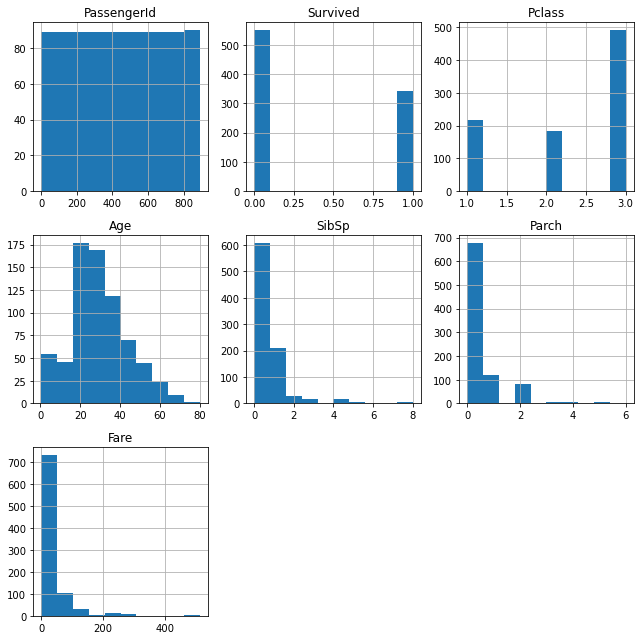

In [277]:
train_data_raw.hist(figsize=(9,9))
plt.tight_layout()

In [278]:
train_data_raw['Survived'].value_counts().apply(lambda x:f'{x} ({x*100/len(train_data_raw):0.2f}%)')

0    549 (61.62%)
1    342 (38.38%)
Name: Survived, dtype: object

Initial Inferences :

- The dataset is mildly imbalanced.
- The columns 'PassengerId' & 'Name' are unique identifiers.
- 'Survived' is the target column that we have to predict.
- The columns 'Pclass', 'Sex' and 'Embarked' are categorical columns and the rest are numerical.
- The column 'SibSp' should ideally be integer value.


We shall split our training data to train-test set before proceeding further to avoid any data leakage into test set.

In [279]:
from sklearn.model_selection import train_test_split

We shall create a copy of train_set so as to not loose the original training set during feature engineering.

In [280]:
train_set,test_set = train_test_split(train_data_raw,test_size=0.2,stratify=train_data_raw['Survived'],random_state=21)

In [281]:
train_original = train_set.copy()
train_set.reset_index(drop=True,inplace=True)

In [282]:
train_set.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
422,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
413,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
637,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
170,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
391,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S


In [283]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,444.730337,0.383427,2.307584,29.806678,0.485955,0.376404,31.756120
std,259.308184,0.486563,0.831550,14.836519,1.025593,0.769609,48.467739
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,218.750000,0.000000,2.000000,20.375000,0.000000,0.000000,7.895800
50%,443.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250
75%,668.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.500000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [284]:
# No. of unique elements in each column
train_set.apply(lambda x: x.nunique())

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             87
SibSp            7
Parch            7
Ticket         569
Fare           226
Cabin          119
Embarked         3
dtype: int64

In [285]:
num_cols = train_set.select_dtypes('number').columns.drop(['PassengerId','Survived','Pclass']).to_numpy()
cat_cols = list(train_set.select_dtypes('object').columns.drop(['Name']))
cat_cols.extend(['Pclass'])
print("Numerical Columns : ",num_cols)
print("Categorical Columns : ",cat_cols)

Numerical Columns :  ['Age' 'SibSp' 'Parch' 'Fare']
Categorical Columns :  ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']


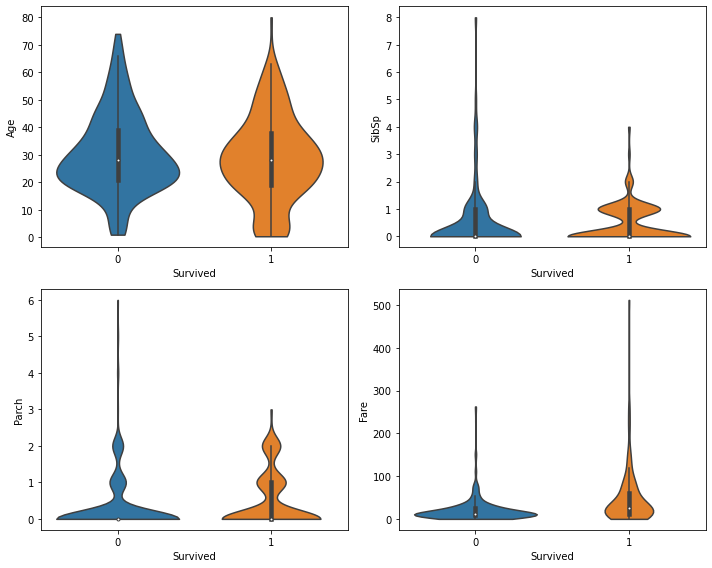

In [286]:
n_def_num_cols = len(num_cols)
fig,ax = plt.subplots(round(n_def_num_cols/2),2,figsize=(10,n_def_num_cols*2))
for i,col in enumerate(num_cols):
  sns.violinplot(x='Survived',y=col,data=train_set,ax=ax.ravel()[i],orient='v',cut=0)
fig.tight_layout()

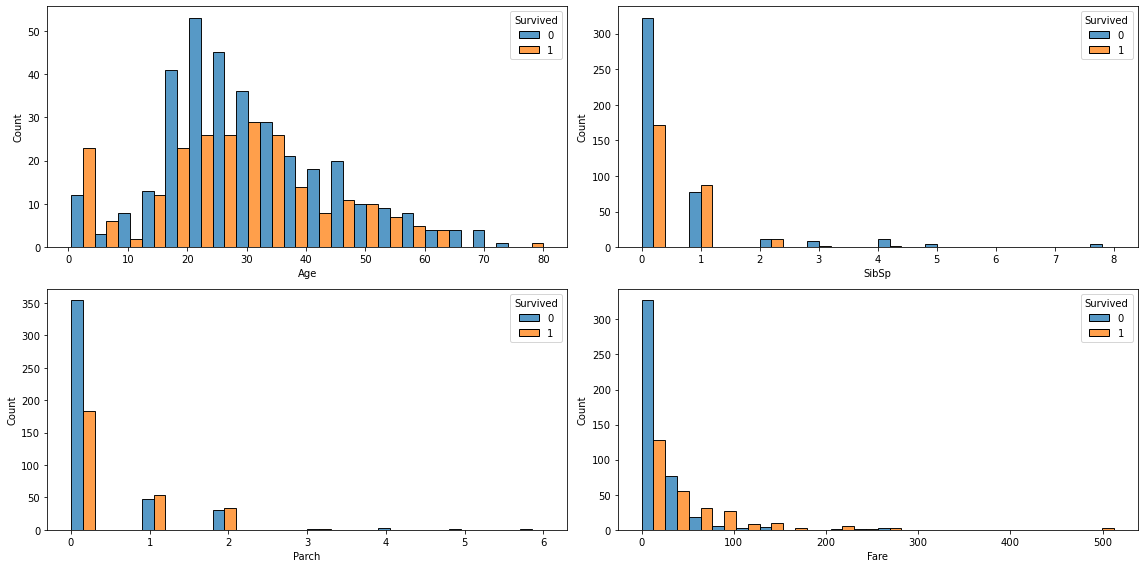

In [287]:
fig,ax = plt.subplots(round(n_def_num_cols/2),2,figsize=(16,n_def_num_cols*2))
for i,col in enumerate(num_cols):
  sns.histplot(x=col,data=train_set,hue='Survived',multiple='dodge',ax=ax.ravel()[i],bins=20,lw=1)
fig.tight_layout()

- We can see that, the survival rate is higher for the kids and elderly. The survial rate for inividuals between 20-30 is very low.
- We could also observe that the chances of survival is increasing with the price paid for the ticket.

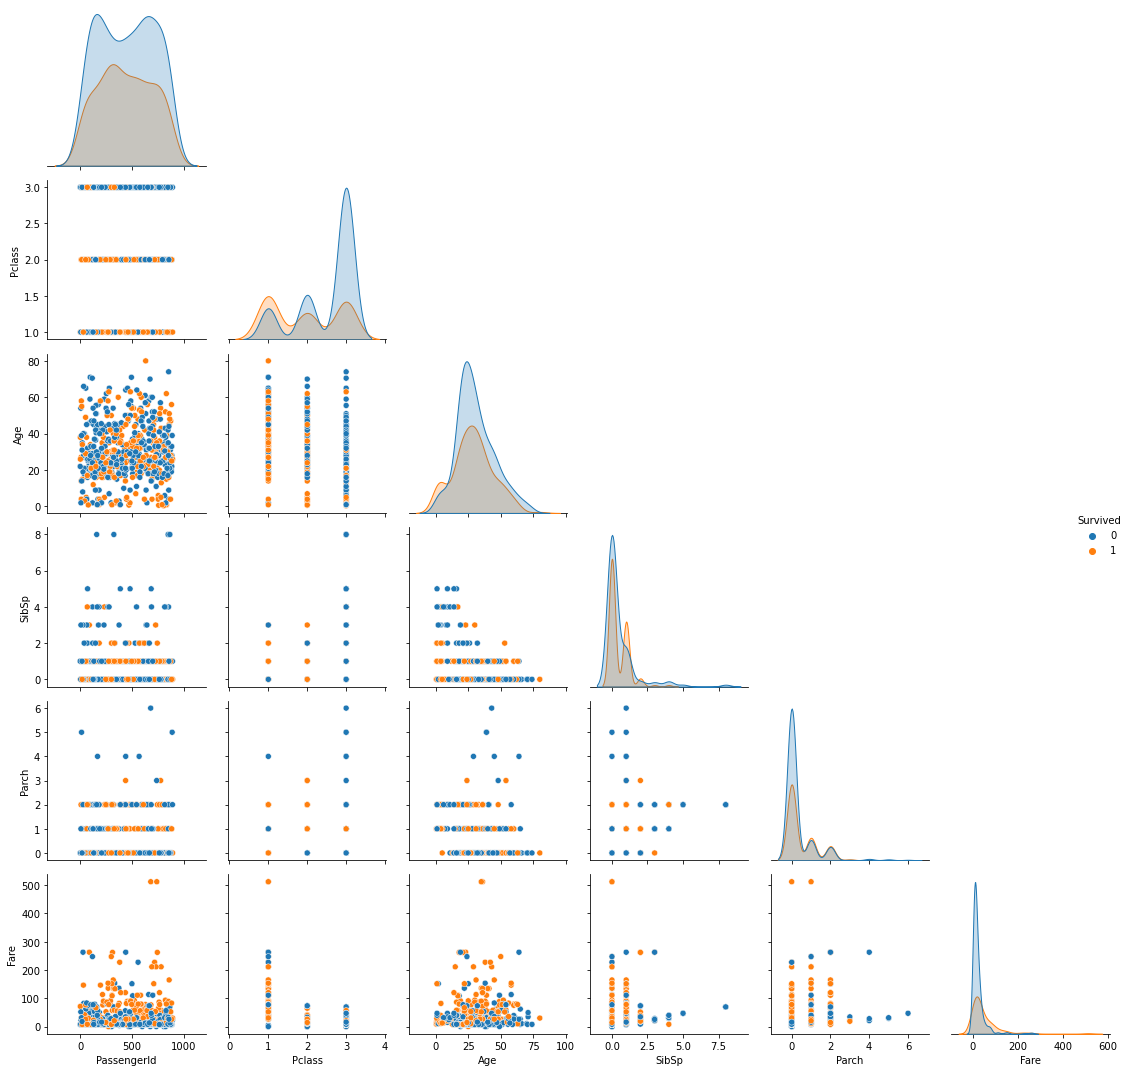

In [288]:
sns.pairplot(hue='Survived',data=train_set,corner=True)
plt.tight_layout()

- The classification of survival isnt linearly seperable with any of the feature.
- There arent any distinct correlation within various features.

In [289]:
train_corr = train_set.corr()

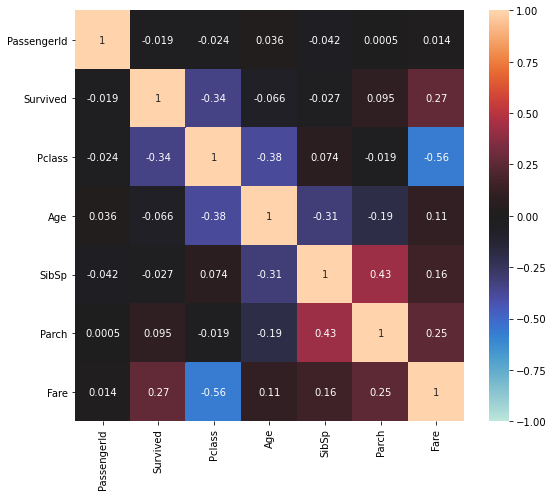

In [290]:
plt.subplots(figsize=(8,7))
sns.heatmap(train_corr,vmax=1,vmin=-1,annot=True,cmap=sns.color_palette("icefire", as_cmap=True))
plt.tight_layout()

In [291]:
print("Correlation of Features with 'Survived' \n")
train_corr.loc[:,'Survived'].sort_values(ascending=False).drop('Survived')

Correlation of Features with 'Survived' 



Fare           0.268678
Parch          0.094806
PassengerId   -0.018821
SibSp         -0.027243
Age           -0.065538
Pclass        -0.340564
Name: Survived, dtype: float64

In [292]:
print("Correlation within Features  \n")
for i,y in enumerate(train_corr.index):
    for j,x in enumerate(train_corr.columns.drop('Survived')):
        if(j<i):
            continue
        if ((train_corr.loc[x,y] >0.4) or (train_corr.loc[x,y] <-0.4)) and x!=y:
            print(f'{x} - {y}  : {train_corr.loc[x,y]}')

Correlation within Features  

Fare - Pclass  : -0.5648039044618169
Parch - SibSp  : 0.4272373837023007


- The Ticket class has the highest correlation with the target column 'Survived'
- The ticket fare and the ticket class are correlated which makes much sense.
- Also the number of siblings/spouses aboard is correlated with the number of parents/children aboard.

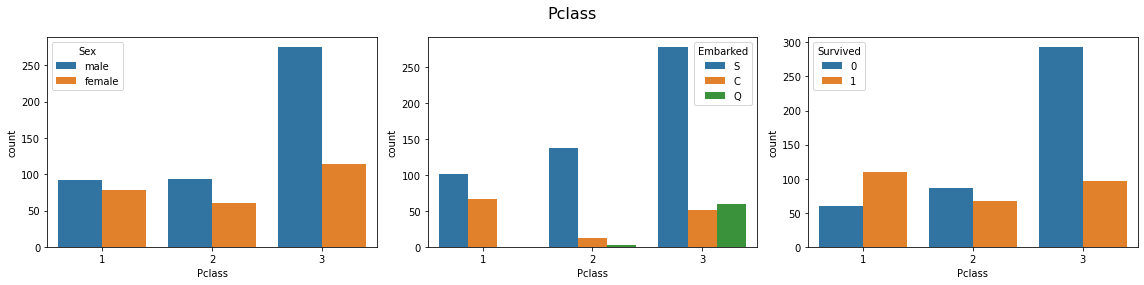

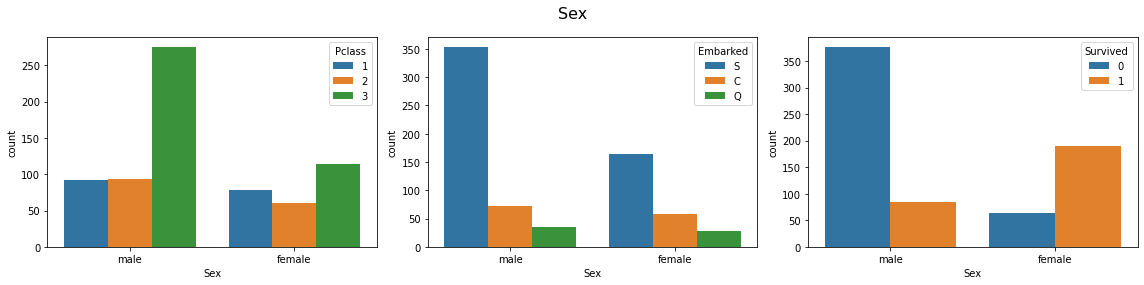

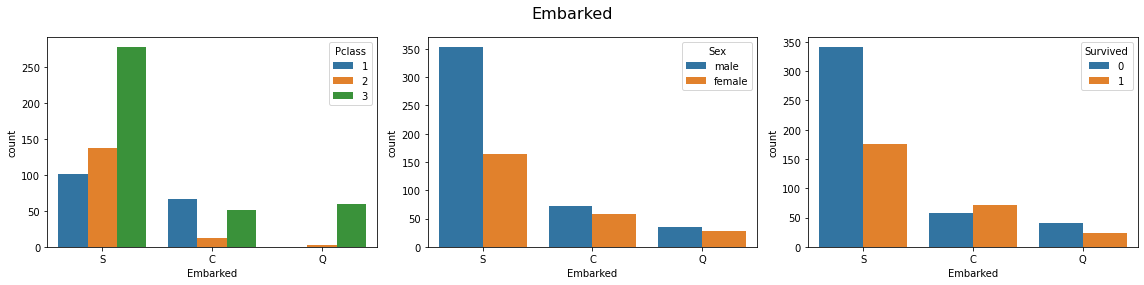

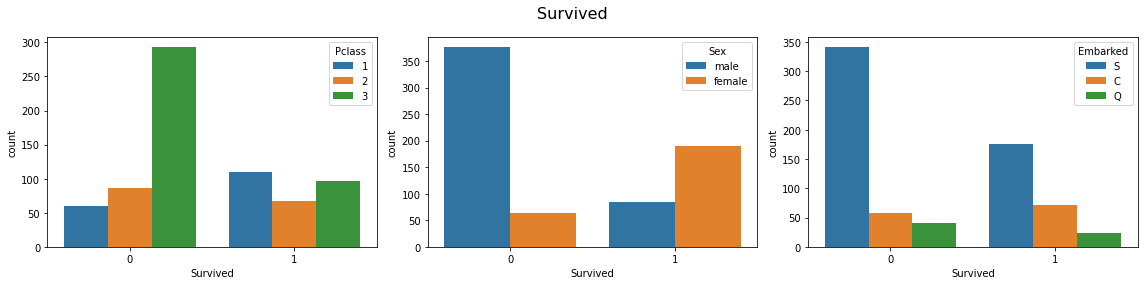

In [293]:
for i,col in enumerate(['Pclass','Sex','Embarked','Survived']):
  j=0
  fig,ax = plt.subplots(1,3,figsize=(16,4),)
  for col1 in ['Pclass','Sex','Embarked','Survived']:
    if col1!=col:    
      sns.countplot(x=col,data=train_set,hue=col1,ax=ax[j])
      j=j+1
  
  fig.suptitle(col,size=16)
  fig.tight_layout()

As we can see, some of the insights that can be drawn are
- The survival chances for females were much higher than males.
- The chances of survival  were higher for Individuals with TicketClass('Pclass')-1. Passengers with Class-1 Ticket has survived more than any other class.
- Passengers who embarked from port Cherbourg has a higher survival ratio.
- Most passengers with 1st class tickets survived and the survival rate was much higher than any other ticket class. It could also be noted that there were no 1st class passengers from Queenstown.
- Passengers embarked from Cherbourg has higher survival ratio.



In [294]:
from scipy.stats import chi2_contingency

In [295]:
alpha = 0.05
for col in cat_cols:
  cross_table = pd.crosstab(train_set[col],train_set['Survived'])
  chi2_stat,p_value, dof, exp = chi2_contingency(cross_table)
  if p_value <= alpha:
    print(f"{col}-Survived \np-value : ",p_value)
    print("Dependent (reject H0)",'\n')
  else:
    print(f"{col}-Survived \np-value : ",p_value)
    print("Independent (fail to reject H0)",'\n')

Sex-Survived 
p-value :  1.277767685540944e-49
Dependent (reject H0) 

Ticket-Survived 
p-value :  0.03529249290136183
Dependent (reject H0) 

Cabin-Survived 
p-value :  0.1860186007157923
Independent (fail to reject H0) 

Embarked-Survived 
p-value :  4.255379308445157e-05
Dependent (reject H0) 

Pclass-Survived 
p-value :  1.1461931253253146e-18
Dependent (reject H0) 



Only 'Cabin' had no relation with 'Survived' column. This could also be due to the unavailability of over 75% of the data for 'Cabin'

# Data Preparation

In [296]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [297]:
# Modifying DataType
#
train_set.loc[:,cat_cols] = train_set[cat_cols].astype('category',errors='ignore')
train_set.loc[:,'PassengerId'] = train_set[['PassengerId']].astype('object',errors='ignore')

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [298]:
def missing_count(data,cols=None):
  print("Number of Instances : ",len(data))
  print("Number of Missing Values in :")
  df = pd.DataFrame(data)
  if cols==None:
    cols=df.columns
  for x in cols:
    count  = df[x].isna().sum()
    if count >=1:
      print(f' - {x} : {count}({count*100/len(df):0.2f}%)')



In [299]:
missing_count(train_set)

Number of Instances :  712
Number of Missing Values in :
 - Age : 140(19.66%)
 - Cabin : 550(77.25%)
 - Embarked : 2(0.28%)


- Embarked has 2 values missing, we could remove the entry/instance since its only 2.
- Age has 140 values missing, which constitutes about 20% of the whole data. We could impute these missing values.
- Cabin has more than 75% of missing values. Ideally we should drop this feature or find some way to extract any available information if possible.

## Feature Engineering

### Feature - 'Embarked '

In [300]:
train_set.dropna(subset=['Embarked'],inplace=True)
train_set.reset_index(drop=True,inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/2049774218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.dropna(subset=['Embarked'],inplace=True)


We shall impute the missing values in 'Age'. We had noticed that 'Pclass' had the highest correlation with 'Age', so instead of taking the median of the whole training set, we shall impute with class-wise(ticket) median age.

### Feature - 'Age'

In [301]:
pclass_avg_age = train_set.groupby(['Pclass'])['Age'].median()
pclass_avg_age

Pclass
1    38.0
2    30.0
3    24.0
Name: Age, dtype: float64

In [302]:
pd.Series(train_set.columns)

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object

In [303]:
train_set.Age = train_set.apply((lambda x: pclass_avg_age[x[8]] if np.isnan(x[0]) else x[0]),axis=1)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [304]:
missing_count(train_set)

Number of Instances :  710
Number of Missing Values in :
 - Cabin : 550(77.46%)


'Cabin' has over 77% of its values missing, dropping the column is the ideal choice. But before droping, we shall try to extract any information if possible.

### Feature - 'Cabin'

In [305]:
print("No. of Entries available : ",train_set.Cabin.notna().sum(),'\n')
train_set.Cabin.unique()

No. of Entries available :  160 



[NaN, 'C128', 'C103', 'B35', 'C22 C26', ..., 'C2', 'A26', 'D7', 'E12', 'C125']
Length: 119
Categories (118, object): ['C128', 'C103', 'B35', 'C22 C26', ..., 'A26', 'D7', 'E12', 'C125']

In [306]:
# Checking if all the values in Cabin starts with an alphabet
pd.Series([str(x)[0].isalpha() if x!=np.nan else False for x in train_set.Cabin.unique()]).sum()

119

In [307]:
# Checking if multiple people have the same cabin/s
train_set.Cabin.value_counts()

G6             4
E101           3
F2             3
C23 C25 C27    3
C22 C26        3
              ..
C110           1
C106           1
C103           1
T              1
B28            0
Name: Cabin, Length: 119, dtype: int64

As we can see, all of 119 unique elements starts with an alphabet. We could group the Cabin codes using this initial alphabet character.

In [308]:
shared_cabins = train_set.Cabin.value_counts()[train_set.Cabin.value_counts()>1].index
shared_cabins

CategoricalIndex(['G6', 'E101', 'F2', 'C23 C25 C27', 'C22 C26', 'B96 B98',
                  'C68', 'B57 B59 B63 B66', 'B58 B60', 'E33', 'B77', 'E25',
                  'C92', 'E121', 'C126', 'C124', 'B5', 'D35', 'D26', 'C52',
                  'C65', 'D20', 'D', 'B51 B53 B55', 'E24', 'B49', 'B20', 'F4',
                  'F33', 'F G73', 'E8', 'B18', 'E67', 'C93', 'E44'],
                 categories=['A14', 'A16', 'A19', 'A23', 'A24', 'A26', 'A31', 'A32', ...], ordered=False, dtype='category')

In [309]:
cabins=[]
for x in train_set.Cabin.value_counts().index:
  if ' ' in x:
    cabins.extend(x.split(' '))
  else:
    cabins.append(x)
print(cabins)

['G6', 'E101', 'F2', 'C23', 'C25', 'C27', 'C22', 'C26', 'B96', 'B98', 'C68', 'B57', 'B59', 'B63', 'B66', 'B58', 'B60', 'E33', 'B77', 'E25', 'C92', 'E121', 'C126', 'C124', 'B5', 'D35', 'D26', 'C52', 'C65', 'D20', 'D', 'B51', 'B53', 'B55', 'E24', 'B49', 'B20', 'F4', 'F33', 'F', 'G73', 'E8', 'B18', 'E67', 'C93', 'E44', 'E38', 'E31', 'D33', 'D28', 'F', 'E69', 'E40', 'F38', 'E77', 'D19', 'D17', 'D15', 'D11', 'E36', 'C99', 'D36', 'E49', 'E17', 'D37', 'D47', 'D48', 'E34', 'D49', 'D50', 'D56', 'D7', 'D9', 'E10', 'E46', 'E12', 'E63', 'E58', 'E68', 'A14', 'C91', 'B22', 'B78', 'B73', 'B69', 'B41', 'B39', 'B38', 'B37', 'B35', 'B30', 'B3', 'B101', 'C90', 'A7', 'A5', 'A36', 'A34', 'A32', 'A31', 'A26', 'A24', 'A23', 'A19', 'B79', 'B80', 'B86', 'C30', 'C87', 'C85', 'C83', 'C70', 'C7', 'A16', 'C50', 'C47', 'C45', 'C32', 'C2', 'C101', 'C148', 'C128', 'C125', 'C123', 'C118', 'C111', 'C110', 'C106', 'C103', 'T', 'B28']


In [310]:
cabin_cat = []
cabin_cat.extend([x[0] for x in cabins])
pd.Series(cabin_cat).value_counts()

C    36
B    32
E    23
D    19
A    12
F     6
G     2
T     1
dtype: int64

In [311]:
for cabin_x in set(cabin_cat):
  train_set[f'Cabin_{cabin_x}']=[int(cabin_x in str(x)) for x in train_set.Cabin]

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/1004718502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'Cabin_{cabin_x}']=[int(cabin_x in str(x)) for x in train_set.Cabin]


We could also try to group Cabins by the number of passengers in it and also by Cabins with more than 1 passenger as passengers in groups may have higher chance of survival.

In [312]:
# Categories of Cabins with more than 1 passenger.

for cabin_ in shared_cabins:
  train_set[f'Cabin_shared_{cabin_}']=[int(x==cabin_) for x in train_set.Cabin]

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/1415746914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'Cabin_shared_{cabin_}']=[int(x==cabin_) for x in train_set.Cabin]


In [313]:
passengers_in_cabin = train_set.Cabin.value_counts()[train_set.Cabin.value_counts()>1]
passengers_in_cabin

G6                 4
E101               3
F2                 3
C23 C25 C27        3
C22 C26            3
B96 B98            3
C68                2
B57 B59 B63 B66    2
B58 B60            2
E33                2
B77                2
E25                2
C92                2
E121               2
C126               2
C124               2
B5                 2
D35                2
D26                2
C52                2
C65                2
D20                2
D                  2
B51 B53 B55        2
E24                2
B49                2
B20                2
F4                 2
F33                2
F G73              2
E8                 2
B18                2
E67                2
C93                2
E44                2
Name: Cabin, dtype: int64

In [314]:
for n in passengers_in_cabin.unique():
  train_set[f'{n}_Passenger_Cabin'] =  0
for index,x in enumerate(train_set.Cabin):
  if x in passengers_in_cabin.index:
    n = passengers_in_cabin[x]
    train_set.loc[index,f'{n}_Passenger_Cabin'] =  1

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/2421986206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'{n}_Passenger_Cabin'] =  0
D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [315]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_C', 'Cabin_A',
       'Cabin_F', 'Cabin_B', 'Cabin_T', 'Cabin_G', 'Cabin_E', 'Cabin_D',
       'Cabin_shared_G6', 'Cabin_shared_E101', 'Cabin_shared_F2',
       'Cabin_shared_C23 C25 C27', 'Cabin_shared_C22 C26',
       'Cabin_shared_B96 B98', 'Cabin_shared_C68',
       'Cabin_shared_B57 B59 B63 B66', 'Cabin_shared_B58 B60',
       'Cabin_shared_E33', 'Cabin_shared_B77', 'Cabin_shared_E25',
       'Cabin_shared_C92', 'Cabin_shared_E121', 'Cabin_shared_C126',
       'Cabin_shared_C124', 'Cabin_shared_B5', 'Cabin_shared_D35',
       'Cabin_shared_D26', 'Cabin_shared_C52', 'Cabin_shared_C65',
       'Cabin_shared_D20', 'Cabin_shared_D', 'Cabin_shared_B51 B53 B55',
       'Cabin_shared_E24', 'Cabin_shared_B49', 'Cabin_shared_B20',
       'Cabin_shared_F4', 'Cabin_shared_F33', 'Cabin_shared_F G73',
       'Cabin_shared_E8', 'Cabin_shared_B18', 'Cabin_share

We shall create a method to do the above done cleaning tasks

In [316]:
def clean_data(X):

    # Modifying DataType
    X.loc[:,cat_cols] = X[cat_cols].astype('category',errors='ignore')
    X.loc[:,'PassengerId'] = X[['PassengerId']].astype('object',errors='ignore')
    X.loc[:,num_cols] = X[num_cols].apply(lambda x: pd.to_numeric(x,errors='coerce'),axis=1)
    
    #Dropping Missing values in Embarked
    X.dropna(subset=['Embarked'],inplace=True)

    # Imputing Missing values in Age
    X.Age = X.apply((lambda x: pclass_avg_age[x[8]] if np.isnan(x[0]) else x[0]),axis=1)

    X = X.reset_index(drop=True)

    if 'Survived' in X:
      y = X.Survived
      X = X.drop(['Survived'],axis=1)

      return X,y
    else:
      return X


We could follow a similar approach to 'Ticket' as in 'Cabin'. We shall try to extract any useful information possible from Ticket column.

### Feature - 'Ticket'

In [317]:
train_set.Ticket.nunique()

568

In [318]:
train_set.Ticket.head(25)

0            S.P. 3464
1            Fa 265302
2     C.A./SOTON 34068
3               350035
4               349242
5                29750
6               113510
7               113783
8             PC 17477
9                 2699
10              349253
11              364498
12              113781
13              349251
14              345779
15              248727
16              349909
17               26707
18              347085
19              330932
20              248738
21            PC 17757
22              345764
23               16966
24              229236
Name: Ticket, dtype: category
Categories (569, object): ['110152', '110413', '110465', '110564', ..., 'W./C. 6608', 'W.E.P. 5734', 'W/C 14208', 'WE/P 5735']

In [319]:
# Checking if the initial text in String are random/unique or if it has any significance
pd.Series([str(x).split(' ')[0] if ' ' in str(x) else x for x in train_set.Ticket]).value_counts()

PC        46
C.A.      21
STON/O     9
A/5        9
W./C.      7
          ..
2687       1
349253     1
349236     1
2620       1
13509      1
Length: 466, dtype: int64

The tickets seems much more random at first glance apart from the fact that they are mostly numerical or numericals preceeded by some text. Individuals travelling together will have the same ticket code.

In [320]:
ticket_codes=[]
for x in train_set.Ticket.value_counts().index:
  if ' ' in x:
    ticket_codes.append(x.split(' ')[0])
print(ticket_codes)

['CA', 'CA.', 'S.O.C.', 'PC', 'W./C.', 'F.C.C.', 'PC', 'PC', 'PC', 'C.A.', 'PC', 'PC', 'PP', 'C.A.', 'C.A.', 'C.A.', 'PC', 'PC', 'PC', 'PC', 'S.C./PARIS', 'A/4', 'W./C.', 'S.O./P.P.', 'SC/Paris', 'A/5.', 'C', 'PC', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SO/C', 'SCO/W', 'SC/Paris', 'SC/PARIS', 'SC/PARIS', 'SC/PARIS', 'SC/AH', 'SC', 'S.W./PP', 'S.P.', 'S.O.P.', 'S.O./P.P.', 'S.C./A.4.', 'PP', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SOTON/O.Q.', 'STON/O', 'W/C', 'W.E.P.', 'W./C.', 'W./C.', 'SW/PP', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'STON/O', 'STON/O', 'STON/O', 'SOTON/O.Q.', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/O2', 'SOTON/O2', 'PC', 'PC', 'PC', 'C', 'A4.', 'A/5.', 'A/5.', 'A/5.', 'A/5.', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/4.', 'A/4.', 'A/4.', 'A/4', 'A.5.', 'A.5.', 'A./5.', 'A./5.', 'C', 'C', 'C.A.', 'F.C.C.'

In [321]:
ticket_codes = [x.replace('.','') for x in ticket_codes]
ticket_pattern_uniq = pd.Series(ticket_codes).unique()
pd.Series(ticket_codes).value_counts()

PC          34
CA          20
A/5         16
SOTON/OQ    11
STON/O       9
W/C          5
A/4          5
STON/O2      5
C            4
SC/PARIS     4
FCC          3
SC/Paris     2
A5           2
SOTON/O2     2
SO/PP        2
SW/PP        2
PP           2
SCO/W        1
WE/P         1
P/PP         1
SOC          1
SC/AH        1
SP           1
SC           1
Fa           1
SOP          1
CA/SOTON     1
SC/A4        1
A4           1
WEP          1
SO/C         1
dtype: int64

In [322]:
for x in ticket_pattern_uniq:
  train_set['Ticket_'+x] = [int(x == str(y).split(' ')[0].replace('.','')) for y in train_set.Ticket]

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/3030581625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Ticket_'+x] = [int(x == str(y).split(' ')[0].replace('.','')) for y in train_set.Ticket]


In [323]:
shared_tickets = train_set.Ticket.value_counts()[train_set.Ticket.value_counts()>1]
shared_tickets

347082           5
CA 2144          5
1601             5
3101295          4
349909           4
                ..
11967            2
SC/Paris 2123    2
16966            2
392096           2
A/5. 3336        2
Name: Ticket, Length: 103, dtype: int64

In [324]:
for n in shared_tickets.unique():
  train_set[f'{n}_Passenger_Ticket'] =  0
for index,x in enumerate(train_set.Ticket):
  if x in shared_tickets.index:
    n = shared_tickets[x]
    train_set.loc[index,f'{n}_Passenger_Ticket'] =  1

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/3651013050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'{n}_Passenger_Ticket'] =  0
D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [325]:
train_set.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Ticket_A4,Ticket_A5,Ticket_P/PP,Ticket_Fa,Ticket_CA/SOTON,Ticket_WE/P,5_Passenger_Ticket,4_Passenger_Ticket,3_Passenger_Ticket,2_Passenger_Ticket
52,123,0,2,"Nasser, Mr. Nicholas",male,123,1,0,237736,30.0708,...,0,0,0,0,0,0,0,0,0,1
60,860,0,3,"Razi, Mr. Raihed",male,860,0,0,2629,7.2292,...,0,0,0,0,0,0,0,0,0,0
92,341,1,2,"Navratil, Master. Edmond Roger",male,341,1,1,230080,26.0000,...,0,0,0,0,0,0,0,0,1,0
266,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,229,0,0,236171,13.0000,...,0,0,0,0,0,0,0,0,0,0
250,480,1,3,"Hirvonen, Miss. Hildur E",female,480,0,1,3101298,12.2875,...,0,0,0,0,0,0,0,0,0,0


### Feature - 'PassengerId'

In [326]:
train_set['PassengerId']

0       68
1      155
2      884
3      500
4      520
      ... 
705    575
706    248
707    189
708    329
709    207
Name: PassengerId, Length: 710, dtype: object

- PassengerId column contains unique integer values only, no useful information can be extracted from them. Dropping is ideal.

In [327]:
train_set['Name']

0                            Crease, Mr. Ernest James
1                               Olsen, Mr. Ole Martin
2                       Banfield, Mr. Frederick James
3                                  Svensson, Mr. Olof
4                                 Pavlovic, Mr. Stefo
                            ...                      
705                      Rush, Mr. Alfred George John
706                   Hamalainen, Mrs. William (Anna)
707                                  Bourke, Mr. John
708    Goldsmith, Mrs. Frank John (Emily Alice Brown)
709                        Backstrom, Mr. Karl Alfred
Name: Name, Length: 710, dtype: object

- For passenger 'Name', all seems to have a 'Title'.

In [328]:
train_set['Title'] = train_set['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
print(train_set['Title'].unique())
train_set['Title'].nunique()

['Mr' 'Mrs' 'Miss' 'Mlle' 'Master' 'Dr' 'Major' 'Rev' 'Lady'
 'the Countess' 'Don' 'Jonkheer' 'Ms' 'Col']


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/1176858206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Title'] = train_set['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])


14

- All passengers have a title in their name and to be specific there are 14 titles. 
- Mlle is French for Ms, so we shall replace this.

In [329]:
train_set['Title'] = train_set['Title'].replace(['Mlle'],['Ms'])
print(train_set['Title'].unique())
train_set['Title'].nunique()

['Mr' 'Mrs' 'Miss' 'Ms' 'Master' 'Dr' 'Major' 'Rev' 'Lady' 'the Countess'
 'Don' 'Jonkheer' 'Col']


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/1482636708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Title'] = train_set['Title'].replace(['Mlle'],['Ms'])


13

In [330]:
pd.crosstab(train_set['Survived'],train_set['Title'])

Title,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mr,Mrs,Ms,Rev,the Countess
Survived,,,,,,,,,,,,,
0,1,1,3,1,0,1,12,41,352,22,0,5,0
1,1,0,0,0,1,0,17,102,66,80,3,0,1


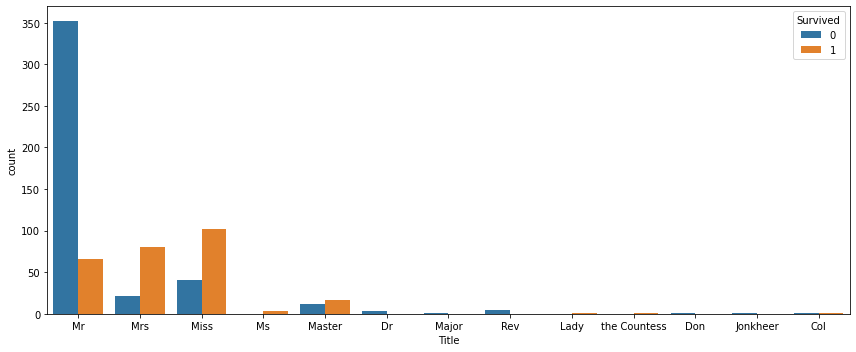

In [331]:
fig,ax = plt.subplots(figsize=(12,5))
sns.countplot(hue='Survived',data=train_set,x='Title',)
plt.tight_layout()

We could also add a feature of Family Size

### Feature - 'SibSp' & 'Parch'

In [332]:
train_set['FamilySize'] = train_set.SibSp +	train_set.Parch
train_set['FamilySize'].unique()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/3392671291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['FamilySize'] = train_set.SibSp +	train_set.Parch


array([ 0,  2,  3,  4,  1,  5, 10,  7,  6], dtype=int64)

We have now extracted information from the features 'Cabin','Ticket' and 'Name' and now we shall drop these columns along with 'PassengerId'.


In [333]:
train_set.drop(['Cabin','Ticket','PassengerId','Name'],axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [334]:
cat_cols_updated = list(cat_cols)
cat_cols_updated.append('Title')
num_cols_updated = list(num_cols)
num_cols_updated.append('FamilySize')

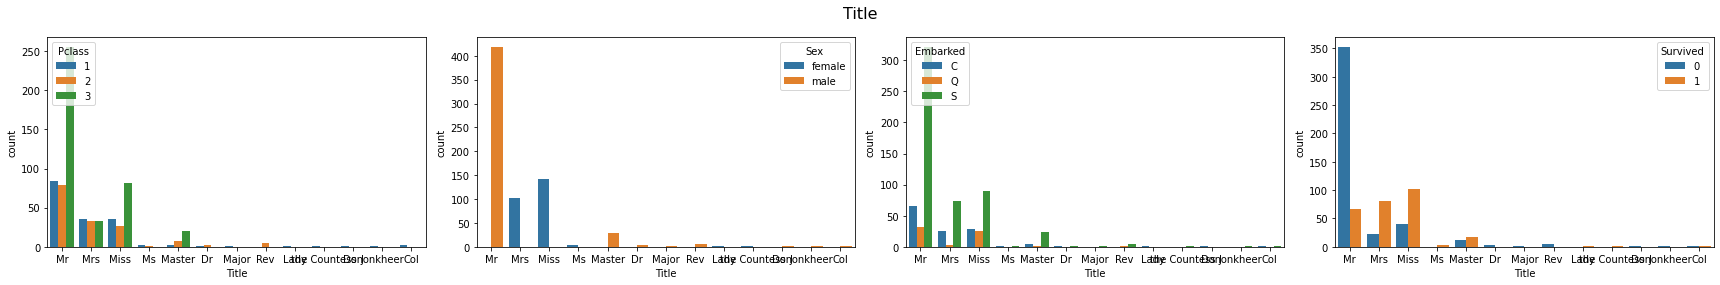

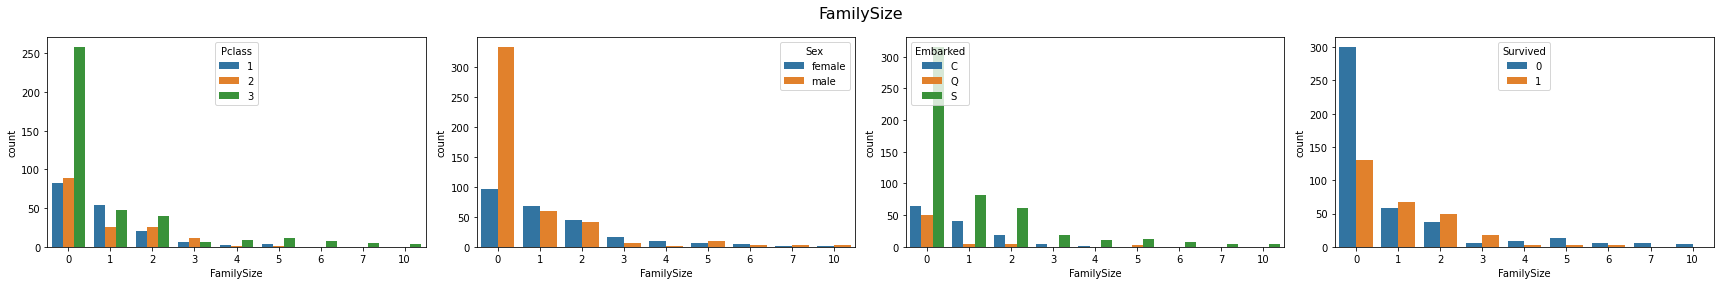

In [335]:
for i,col in enumerate(['Title','FamilySize']):
  j=0
  fig,ax = plt.subplots(1,4,figsize=(24,4),)
  for col1 in ['Pclass','Sex','Embarked','Survived']:
      sns.countplot(x=col,data=train_set,hue=col1,ax=ax[j])
      j=j+1
  
  fig.suptitle(col,size=16)
  fig.tight_layout()

We will create a Custom Transformer to extract/create new features

In [336]:
from sklearn.base import TransformerMixin,BaseEstimator

In [337]:
class FeatureEngineering(TransformerMixin,BaseEstimator):

  def __init__(self):
    self
  
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):

    X = X.reset_index(drop=True)

    # Creating Feature 'Title'
    X['Title'] = X['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
    X['Title'] = X['Title'].replace(['Mlle'],['Ms'])

    # Creating Feature 'FamilySize'
    X['FamilySize'] = X.SibSp +	X.Parch


    #cabins=[]
    #cabin_cat = []
    #for x in X.Cabin.value_counts().index:
    #  if ' ' in x:
    #    cabins.extend(x.split(' '))
    #  else:
    #    cabins.append(x)
    #cabin_cat.extend([x[0] for x in cabins])
    for cabin_x in set(cabin_cat):
      X[f'Cabin_{cabin_x}']=[int(cabin_x in str(x)) for x in X.Cabin]

    #shared_cabins = X.Cabin.value_counts()[X.Cabin.value_counts()>1].index
    for cabin_ in shared_cabins:
      X[f'Cabin_shared_{cabin_}']=[int(x==cabin_) for x in X.Cabin]

    #passengers_in_cabin = X.Cabin.value_counts()[X.Cabin.value_counts()>1]
    for n in passengers_in_cabin.unique():
      X[f'{n}_Passenger_Cabin'] =  0
    for index,x in enumerate(X.Cabin):
      if x in passengers_in_cabin.index:
        n = passengers_in_cabin[x]
        X.loc[index,f'{n}_Passenger_Cabin'] =  1


    #ticket_codes=[]
    #for x in X.Ticket.value_counts().index:
    #  if ' ' in x:
    #    ticket_codes.append(x.split(' ')[0])
    #ticket_codes = [x.replace('.','') for x in ticket_codes]
    #ticket_pattern_uniq = pd.Series(ticket_codes).unique()
    for x in ticket_pattern_uniq:
      X['Ticket_'+x] = [int(x == str(y).split(' ')[0].replace('.','')) for y in X.Ticket]

    for ticket_ in shared_tickets.index:
      X[f'Ticket_shared_{ticket_}']=[int(x==ticket_) for x in X.Ticket]

    #shared_tickets = X.Ticket.value_counts()[X.Ticket.value_counts()>1]
    for n in shared_tickets.unique():
      X[f'{n}_Passenger_Ticket'] =  0
    for index,x in enumerate(X.Ticket):
      if x in shared_tickets.index:
        n = shared_tickets[x]
        X.loc[index,f'{n}_Passenger_Ticket'] =  1

    X = X.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1)

    return X


In [338]:
# A custom transformer to view the data inbetween the various stages of the pipeline
class TransformationSubStage(TransformerMixin,BaseEstimator):

  def __init__(self):
    self
    self.transformed_X = None
    self.transformed_y = None
  
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    self.transformed_X = X
    self.transformed_y = y
    return X

## Building a Pipeline

In [339]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [340]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [341]:
sub_pipe1 = Pipeline([
                      ('imputer',SimpleImputer(strategy='most_frequent')),
                      (('ohe',OneHotEncoder(handle_unknown='ignore')))
])

In [342]:
coltransformer = ColumnTransformer([
                                    ('num_impute',SimpleImputer(strategy='median'),['Age', 'SibSp', 'Parch', 'FamilySize']),
                                    ('num_impute2',SimpleImputer(strategy='mean'),['Fare']),
                                    ('cat_impute',sub_pipe1,['Sex', 'Embarked', 'Pclass', 'Title'])
],remainder='passthrough')

In [343]:
pipe = Pipeline([
                 ('feat_engg',FeatureEngineering()),
                 ('substage_feat_engg',TransformationSubStage()),
                 ('coltransformer',coltransformer),
                 ('substage_coltransformer',TransformationSubStage()),
                 ('num',StandardScaler()),
])

In [344]:
X_train,y_train = clean_data(train_original)
X_train = pipe.fit_transform(X_train)

In [345]:
X_train.shape

(710, 210)

In [346]:
X_test,y_test = clean_data(test_set)
X_test = pipe.transform(X_test)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1884/3957259135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['Embarked'],inplace=True)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [347]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [348]:
from sklearn.metrics import accuracy_score

In [349]:
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

In [350]:
models = {}

# ML Modeling

### Logistic Regression

In [351]:
logreg_gridSearch = LogisticRegressionCV(solver='saga',penalty='elasticnet',Cs=[0.1,0.2,0.5,1,10,15,20,25,50,100,100],l1_ratios=[0,0.35,0.5,0.65,1],n_jobs=-1,cv=3,random_state=0)
logreg_gridSearch.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

LogisticRegressionCV(Cs=[0.1, 0.2, 0.5, 1, 10, 15, 20, 25, 50, 100, 100], cv=3,
                     l1_ratios=[0, 0.35, 0.5, 0.65, 1], n_jobs=-1,
                     penalty='elasticnet', random_state=0, solver='saga')

In [352]:
logreg = LogisticRegression(solver='saga',penalty='elasticnet',C=logreg_gridSearch.C_[0],l1_ratio=logreg_gridSearch.l1_ratio_[0],n_jobs=-1,random_state=0)
logreg.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.1, l1_ratio=0.65, n_jobs=-1, penalty='elasticnet',
                   random_state=0, solver='saga')

In [353]:
accuracy = accuracy_score(y_test,logreg.predict(X_test))
accuracy

0.8379888268156425

In [354]:
models['Logistic Regression'] = accuracy

### Linear SVC

In [355]:
params ={'C':[0.01,0.1,1,2,5,10,20,50,100,1000],
         'penalty':['l1','l2']}
lin_svc = GridSearchCV(LinearSVC(random_state=0),params)

In [356]:
lin_svc.fit(X_train,y_train)
lin_svc.best_params_

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "D:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "D:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "D:\anaconda3\lib\site-packages\sklearn\svm\_base

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83943662        nan 0.83661972        nan 0.83661972
  

{'C': 5, 'penalty': 'l2'}

In [357]:
lin_svc = lin_svc.best_estimator_

In [358]:
accuracy = accuracy_score(y_test,lin_svc.predict(X_test))
accuracy

0.8324022346368715

In [359]:
models['Linear SVC'] = accuracy

### SVC

In [360]:
params ={'C':[0.01,0.1,1,2,5,10,20,50,100,1000],
         'kernel':['rbf','sigmoid']}
svc = GridSearchCV(SVC(random_state =0,probability=True),params)

In [361]:
svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10, 20, 50, 100, 1000],
                         'kernel': ['rbf', 'sigmoid']})

In [362]:
svc.best_params_

{'C': 2, 'kernel': 'sigmoid'}

In [363]:
svc = svc.best_estimator_

In [364]:
accuracy = accuracy_score(y_test,svc.predict(X_test))
accuracy

0.8379888268156425

In [365]:
models['SVC'] = accuracy

### Decision Tree Classifier

In [366]:
dt_clf = DecisionTreeClassifier(random_state =0)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [367]:
accuracy = accuracy_score(y_test,dt_clf.predict(X_test))
accuracy

0.7597765363128491

In [368]:
models['Decision Tree'] = accuracy

### Random Forest Classifier (Ensemble)

In [369]:
!pip install -q optuna

In [370]:
import optuna

In [371]:
def objective(trial):

  max_features=trial.suggest_float('max_features',0.3,1,step=0.05)
  max_samples=trial.suggest_float('max_samples',0.3,0.95,step=0.05)
  min_samples_split=trial.suggest_float('min_samples_split',0.01,0.11,step=0.01)
  class_weight=trial.suggest_categorical('class_weight',['balanced', 'balanced_subsample',None])

  clf = RandomForestClassifier(max_features=max_features, max_samples=max_samples, min_samples_split=min_samples_split,class_weight=class_weight,random_state =0)

  return cross_val_score(clf,X_train,y_train,cv=3,n_jobs=-1,scoring='accuracy').mean()

In [372]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

[I 2021-11-03 21:28:29,441] A new study created in memory with name: no-name-6de984cd-56f5-4f38-8422-e94e244985d5
[I 2021-11-03 21:28:29,671] Trial 0 finished with value: 0.7971286562254166 and parameters: {'max_features': 0.65, 'max_samples': 0.3, 'min_samples_split': 0.09999999999999999, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7971286562254166.
[I 2021-11-03 21:28:29,983] Trial 1 finished with value: 0.8351688955636606 and parameters: {'max_features': 0.75, 'max_samples': 0.65, 'min_samples_split': 0.02, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:30,218] Trial 2 finished with value: 0.8083863739302487 and parameters: {'max_features': 0.55, 'max_samples': 0.4, 'min_samples_split': 0.06999999999999999, 'class_weight': None}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:30,466] Trial 3 finished with value: 0.8295251376671673 and parameters: {'max_features': 0.45, 'max_samples': 0.55

[I 2021-11-03 21:28:38,645] Trial 32 finished with value: 0.8281425063767909 and parameters: {'max_features': 0.95, 'max_samples': 0.55, 'min_samples_split': 0.01, 'class_weight': None}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:38,927] Trial 33 finished with value: 0.818291258432859 and parameters: {'max_features': 0.9000000000000001, 'max_samples': 0.45, 'min_samples_split': 0.02, 'class_weight': None}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:39,210] Trial 34 finished with value: 0.8140301318267419 and parameters: {'max_features': 0.6000000000000001, 'max_samples': 0.65, 'min_samples_split': 0.06999999999999999, 'class_weight': None}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:39,461] Trial 35 finished with value: 0.8267241173806288 and parameters: {'max_features': 0.3, 'max_samples': 0.5, 'min_samples_split': 0.02, 'class_weight': None}. Best is trial 1 with value: 0.8351688955636606.
[I 2021-11-03 21:28:

In [373]:
best_trial = study.best_trial
print("Accuracy : ",best_trial.value)
best_trial.params

Accuracy :  0.8351688955636606


{'max_features': 0.75,
 'max_samples': 0.65,
 'min_samples_split': 0.02,
 'class_weight': 'balanced_subsample'}

In [374]:
rf_clf = RandomForestClassifier(**best_trial.params,random_state =0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features=0.75,
                       max_samples=0.65, min_samples_split=0.02,
                       random_state=0)

In [375]:
accuracy = accuracy_score(y_test,rf_clf.predict(X_test))
accuracy

0.8268156424581006

In [376]:
models['Random Forest'] = accuracy

### K-Nearest Neighbor Classifier

In [377]:
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}
knn_clf = GridSearchCV(KNeighborsClassifier(), params)

In [378]:
knn_clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [379]:
knn_clf.best_params_

{'n_neighbors': 5}

In [380]:
accuracy = accuracy_score(y_test,knn_clf.predict(X_test))
accuracy

0.7932960893854749

In [381]:
models['K-Nearest Neighbor'] = accuracy

### Gaussian Naive Bayes Classifier

In [382]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_clf = GridSearchCV(GaussianNB(), params)

In [383]:
nb_clf.fit(X_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [384]:
nb_clf.best_params_

{'var_smoothing': 0.0657933224657568}

In [385]:
accuracy = accuracy_score(y_test,nb_clf.predict(X_test))
accuracy

0.659217877094972

In [386]:
models['Gaussian Naive Bayes'] = accuracy

In [387]:
import xgboost as xgb

In [388]:
cv = cross_val_score(xgb.XGBClassifier(),X_train,y_train,cv=5)
print(cv)
print(cv.mean())

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.82394366 0.77464789 0.78873239 0.82394366 0.80985915]
0.80422535211

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [389]:
tst = xgb.XGBClassifier().fit(X_train,y_train)
accuracy_score(y_test,tst.predict(X_test))

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7821229050279329

In [390]:
n_iter = []
def objective_xgb(trial):

  params = {
      'learning_rate' : trial.suggest_loguniform('learning_rate',1e-8,0.5),
      'max_depth' : trial.suggest_int('max_depth',8,33),
      'subsample' : trial.suggest_float('subsample',0.5,1),
      'colsample_bynode' : trial.suggest_float('colsample_bynode',0.5,1),
      'lambda' : trial.suggest_loguniform("lambda", 1e-8, 1.0),
      'alpha': trial.suggest_loguniform("alpha", 1e-8, 1.0),
      'gamma' : trial.suggest_loguniform("gamma", 1e-8, 1.0),
                
      'objective':'binary:logistic','random_state':0
  }
  
  dtrain = xgb.DMatrix(X_train,y_train)


  cv = xgb.cv(params, dtrain, num_boost_round=1000, metrics='auc', early_stopping_rounds=50)
  n_iter.append(len(cv))

  return cv.mean()['test-auc-mean']

In [391]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb,n_trials=800)

[I 2021-11-03 21:28:45,926] A new study created in memory with name: no-name-a1dd26a5-cb3b-4814-a867-1be319cd7c9b
[I 2021-11-03 21:28:46,897] Trial 0 finished with value: 0.8479118950617281 and parameters: {'learning_rate': 2.1496222386382388e-08, 'max_depth': 15, 'subsample': 0.936008412007812, 'colsample_bynode': 0.8948785275695196, 'lambda': 0.0001895843172827469, 'alpha': 1.2945051102477033e-06, 'gamma': 1.333817726148834e-07}. Best is trial 0 with value: 0.8479118950617281.
[I 2021-11-03 21:28:47,556] Trial 1 finished with value: 0.8686425978835981 and parameters: {'learning_rate': 0.00030095640829514694, 'max_depth': 31, 'subsample': 0.5406254190357477, 'colsample_bynode': 0.989283648472455, 'lambda': 1.498906623524982e-06, 'alpha': 3.397790219985327e-07, 'gamma': 0.0005793556979955399}. Best is trial 1 with value: 0.8686425978835981.
[I 2021-11-03 21:28:49,484] Trial 2 finished with value: 0.8453868911111109 and parameters: {'learning_rate': 2.440762573557309e-06, 'max_depth': 1

[I 2021-11-03 21:29:01,176] Trial 22 finished with value: 0.8681500409356726 and parameters: {'learning_rate': 2.1992865470676813e-05, 'max_depth': 22, 'subsample': 0.6625411267890667, 'colsample_bynode': 0.6172692211999868, 'lambda': 9.612250077324549e-08, 'alpha': 0.07721729744666822, 'gamma': 7.052384252874596e-08}. Best is trial 14 with value: 0.8739198194444445.
[I 2021-11-03 21:29:01,685] Trial 23 finished with value: 0.8698498461538458 and parameters: {'learning_rate': 0.0032883777035536093, 'max_depth': 27, 'subsample': 0.5912729463120201, 'colsample_bynode': 0.5386106629116519, 'lambda': 0.0012893159492025567, 'alpha': 0.003840087158947283, 'gamma': 6.64670367053276e-05}. Best is trial 14 with value: 0.8739198194444445.
[I 2021-11-03 21:29:02,252] Trial 24 finished with value: 0.8692834654088049 and parameters: {'learning_rate': 9.144456355192272e-06, 'max_depth': 26, 'subsample': 0.7700160519925606, 'colsample_bynode': 0.7026012884306448, 'lambda': 5.188408584046557e-06, 'alp

[I 2021-11-03 21:29:17,457] Trial 44 finished with value: 0.8716372922824298 and parameters: {'learning_rate': 5.426743032145293e-07, 'max_depth': 31, 'subsample': 0.8066046263582476, 'colsample_bynode': 0.7275109700892991, 'lambda': 1.1016498510951914e-08, 'alpha': 0.06592775770170352, 'gamma': 2.944891127408465e-06}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:18,421] Trial 45 finished with value: 0.8654967946428573 and parameters: {'learning_rate': 5.776364759710377e-06, 'max_depth': 33, 'subsample': 0.8577628145047996, 'colsample_bynode': 0.7892725503279558, 'lambda': 3.848915219780446e-08, 'alpha': 2.725569387728407e-07, 'gamma': 2.4544505187878964e-05}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:18,866] Trial 46 finished with value: 0.872999827586207 and parameters: {'learning_rate': 1.4107236907981798e-06, 'max_depth': 29, 'subsample': 0.9143984106756533, 'colsample_bynode': 0.741137894589057, 'lambda': 3.047482018652246e-07, 'a

[I 2021-11-03 21:29:33,303] Trial 66 finished with value: 0.8692600162601624 and parameters: {'learning_rate': 8.587280776098266e-07, 'max_depth': 30, 'subsample': 0.7518520062742039, 'colsample_bynode': 0.6839285110644154, 'lambda': 2.0091917222842165e-08, 'alpha': 0.05711051585985738, 'gamma': 0.00016740708937635533}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:33,891] Trial 67 finished with value: 0.8717378039215685 and parameters: {'learning_rate': 4.464329791435171e-06, 'max_depth': 32, 'subsample': 0.7199989496561432, 'colsample_bynode': 0.7716967942321702, 'lambda': 1.5145659524401036e-07, 'alpha': 0.11069954312542298, 'gamma': 1.7293273696210632e-05}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:34,326] Trial 68 finished with value: 0.8727481777777779 and parameters: {'learning_rate': 1.3503337086638265e-05, 'max_depth': 31, 'subsample': 0.8348864867587666, 'colsample_bynode': 0.8275691633245779, 'lambda': 1.6443289409684808e-06,

[I 2021-11-03 21:29:45,299] Trial 88 finished with value: 0.8733142091503269 and parameters: {'learning_rate': 3.4636562065634496e-07, 'max_depth': 32, 'subsample': 0.7751504681743256, 'colsample_bynode': 0.756737772069621, 'lambda': 3.993232850104879e-07, 'alpha': 0.66242612187929, 'gamma': 2.022818632371389e-06}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:47,498] Trial 89 finished with value: 0.8753913425925925 and parameters: {'learning_rate': 5.783222213638905e-06, 'max_depth': 31, 'subsample': 0.8376754687074098, 'colsample_bynode': 0.8207850861961653, 'lambda': 1.321086746729094e-05, 'alpha': 0.24796411287204764, 'gamma': 5.806284622425621e-07}. Best is trial 38 with value: 0.8778555438596489.
[I 2021-11-03 21:29:48,431] Trial 90 finished with value: 0.8702938238482388 and parameters: {'learning_rate': 8.257667103103619e-06, 'max_depth': 31, 'subsample': 0.8563391954237559, 'colsample_bynode': 0.826057405143184, 'lambda': 0.000150978982724342, 'alpha': 0

[I 2021-11-03 21:30:00,258] Trial 110 finished with value: 0.8694707979797979 and parameters: {'learning_rate': 3.31454265315925e-06, 'max_depth': 28, 'subsample': 0.6661319721509977, 'colsample_bynode': 0.7470907924344323, 'lambda': 1.389435518175286e-08, 'alpha': 0.12016205408534036, 'gamma': 2.937238621424492e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:00,601] Trial 111 finished with value: 0.8754607 and parameters: {'learning_rate': 1.7381555264537752e-06, 'max_depth': 24, 'subsample': 0.6908419841994203, 'colsample_bynode': 0.6886321942699114, 'lambda': 2.450539974036685e-08, 'alpha': 0.49917076141107397, 'gamma': 7.595021795486987e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:01,212] Trial 112 finished with value: 0.8743572904761906 and parameters: {'learning_rate': 2.423097030660092e-06, 'max_depth': 27, 'subsample': 0.6548915623904489, 'colsample_bynode': 0.687782021075008, 'lambda': 4.9822017196157045e-08, 'alpha': 0.

[I 2021-11-03 21:30:11,404] Trial 132 finished with value: 0.8746106974358975 and parameters: {'learning_rate': 3.790924434191463e-05, 'max_depth': 29, 'subsample': 0.6734818739854463, 'colsample_bynode': 0.7306531440447813, 'lambda': 3.6827902142821507e-08, 'alpha': 0.9622468872731007, 'gamma': 3.843135095027206e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:11,956] Trial 133 finished with value: 0.8766714285714288 and parameters: {'learning_rate': 2.653287692046965e-06, 'max_depth': 28, 'subsample': 0.6812667887634095, 'colsample_bynode': 0.6675732178967113, 'lambda': 8.330394363077519e-08, 'alpha': 0.5220104333001492, 'gamma': 2.696345141379197e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:12,585] Trial 134 finished with value: 0.8751500365296802 and parameters: {'learning_rate': 2.9041408177463042e-06, 'max_depth': 27, 'subsample': 0.8093738281741091, 'colsample_bynode': 0.6614064988618809, 'lambda': 6.720225614571185e-08, 'a

[I 2021-11-03 21:30:23,560] Trial 154 finished with value: 0.8759592676767672 and parameters: {'learning_rate': 6.0632745694918945e-06, 'max_depth': 28, 'subsample': 0.6696559738959497, 'colsample_bynode': 0.6538909959405697, 'lambda': 1.5023831271286162e-08, 'alpha': 0.6606098618488563, 'gamma': 2.661265855612285e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:23,968] Trial 155 finished with value: 0.8769050808080809 and parameters: {'learning_rate': 1.1796346762621078e-05, 'max_depth': 27, 'subsample': 0.7362004736945279, 'colsample_bynode': 0.7384521144534771, 'lambda': 3.811292746371452e-08, 'alpha': 0.6681855237045151, 'gamma': 4.5883192313650445e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:24,328] Trial 156 finished with value: 0.8713812500000001 and parameters: {'learning_rate': 1.3846975648153397e-05, 'max_depth': 26, 'subsample': 0.7257928669519959, 'colsample_bynode': 0.7392589931323826, 'lambda': 1.0806336233608752e-07

[I 2021-11-03 21:30:35,575] Trial 176 finished with value: 0.8694634393939394 and parameters: {'learning_rate': 1.0045644797473683e-05, 'max_depth': 28, 'subsample': 0.6563987213650239, 'colsample_bynode': 0.667468328133246, 'lambda': 1.4391736938877862e-08, 'alpha': 0.9999174959198698, 'gamma': 4.5150683339682e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:36,029] Trial 177 finished with value: 0.8732264684684684 and parameters: {'learning_rate': 7.43926991373045e-07, 'max_depth': 27, 'subsample': 0.7040570332422414, 'colsample_bynode': 0.7671493481878676, 'lambda': 1.204106845750937e-07, 'alpha': 0.40573771887474724, 'gamma': 1.480238368880157e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:36,409] Trial 178 finished with value: 0.8737449999999998 and parameters: {'learning_rate': 1.781061998927509e-06, 'max_depth': 30, 'subsample': 0.7219884956227846, 'colsample_bynode': 0.7465072312207349, 'lambda': 2.489677163776658e-08, 'alph

[I 2021-11-03 21:30:47,866] Trial 198 finished with value: 0.8766576568627449 and parameters: {'learning_rate': 7.128704459083374e-07, 'max_depth': 31, 'subsample': 0.6935128691704818, 'colsample_bynode': 0.7178535599199668, 'lambda': 1.3199375823822035e-07, 'alpha': 0.34313583558784444, 'gamma': 2.3731732253425505e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:48,553] Trial 199 finished with value: 0.8709579343434347 and parameters: {'learning_rate': 6.557748172648633e-07, 'max_depth': 32, 'subsample': 0.740783766329298, 'colsample_bynode': 0.7415068472864439, 'lambda': 1.3427216715824065e-07, 'alpha': 0.003864593108047976, 'gamma': 4.282400272019683e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:30:49,296] Trial 200 finished with value: 0.8788932738095238 and parameters: {'learning_rate': 3.9766056427784513e-07, 'max_depth': 31, 'subsample': 0.6949227089138498, 'colsample_bynode': 0.7078114996863369, 'lambda': 2.479104625717262e-07

[I 2021-11-03 21:30:59,984] Trial 220 finished with value: 0.8697642839506171 and parameters: {'learning_rate': 8.398807902501527e-07, 'max_depth': 32, 'subsample': 0.7875251024824895, 'colsample_bynode': 0.7215973957151613, 'lambda': 1.9488607861436672e-07, 'alpha': 0.12675026912429657, 'gamma': 1.2433463438277262e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:00,426] Trial 221 finished with value: 0.8762327058823529 and parameters: {'learning_rate': 1.2967797946505389e-06, 'max_depth': 30, 'subsample': 0.6953914627057326, 'colsample_bynode': 0.7036489414977457, 'lambda': 1.1022835532317736e-07, 'alpha': 0.3266056520298254, 'gamma': 8.910065178492441e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:01,318] Trial 222 finished with value: 0.8780365349462363 and parameters: {'learning_rate': 5.855585747281768e-07, 'max_depth': 31, 'subsample': 0.6870103388928084, 'colsample_bynode': 0.7487599704933356, 'lambda': 2.0030039980988512e-08

[I 2021-11-03 21:31:11,977] Trial 242 finished with value: 0.8754467138047135 and parameters: {'learning_rate': 6.922719033749796e-07, 'max_depth': 30, 'subsample': 0.7033352767825818, 'colsample_bynode': 0.7235205396926241, 'lambda': 0.0002142856306499419, 'alpha': 0.949047802946874, 'gamma': 4.0001637424180584e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:12,547] Trial 243 finished with value: 0.8753784797979797 and parameters: {'learning_rate': 0.00018493793311421289, 'max_depth': 31, 'subsample': 0.6872523342319078, 'colsample_bynode': 0.7372689903345826, 'lambda': 0.055450049043256795, 'alpha': 0.5705052189388518, 'gamma': 9.162666982917381e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:12,991] Trial 244 finished with value: 0.8753072522522524 and parameters: {'learning_rate': 4.3817449722054495e-07, 'max_depth': 29, 'subsample': 0.7065818340555984, 'colsample_bynode': 0.7168739176245561, 'lambda': 0.05975440183409355, 'alph

[I 2021-11-03 21:31:25,105] Trial 264 finished with value: 0.8723927387387386 and parameters: {'learning_rate': 4.130771286945887e-07, 'max_depth': 31, 'subsample': 0.7362802425544109, 'colsample_bynode': 0.7228720936503817, 'lambda': 2.496967311515847e-05, 'alpha': 0.2563353924211823, 'gamma': 2.3895827659293785e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:25,594] Trial 265 finished with value: 0.8721465075757575 and parameters: {'learning_rate': 2.603958824914582e-07, 'max_depth': 32, 'subsample': 0.8118437599913133, 'colsample_bynode': 0.6920422152121835, 'lambda': 0.05979252108657201, 'alpha': 0.7092174552438818, 'gamma': 7.015521899330179e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:26,115] Trial 266 finished with value: 0.8624310804597699 and parameters: {'learning_rate': 5.626926915183065e-07, 'max_depth': 30, 'subsample': 0.9270764364126763, 'colsample_bynode': 0.7305857118127678, 'lambda': 0.09680719585076353, 'alpha'

[I 2021-11-03 21:31:37,483] Trial 286 finished with value: 0.8732799808743172 and parameters: {'learning_rate': 9.604874600538332e-07, 'max_depth': 16, 'subsample': 0.69223701173172, 'colsample_bynode': 0.7404430340016331, 'lambda': 0.0008534769345901689, 'alpha': 0.010657052157427616, 'gamma': 4.605806480429114e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:38,836] Trial 287 finished with value: 0.8769012037786778 and parameters: {'learning_rate': 6.367108561853871e-07, 'max_depth': 29, 'subsample': 0.6603033448346423, 'colsample_bynode': 0.7049262766945752, 'lambda': 1.0199228529503121e-08, 'alpha': 0.9674285512085562, 'gamma': 2.1616611823925464e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:39,245] Trial 288 finished with value: 0.8730570202020204 and parameters: {'learning_rate': 6.226542930914353e-07, 'max_depth': 29, 'subsample': 0.6577297414141381, 'colsample_bynode': 0.7257526459662036, 'lambda': 1.0390104327475195e-08, '

[I 2021-11-03 21:31:50,280] Trial 308 finished with value: 0.8747856280193235 and parameters: {'learning_rate': 8.844713756911689e-07, 'max_depth': 20, 'subsample': 0.7257989805016353, 'colsample_bynode': 0.7397093920393407, 'lambda': 5.623353767873342e-07, 'alpha': 0.9957433916861405, 'gamma': 1.87725357111849e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:50,757] Trial 309 finished with value: 0.8722413089430897 and parameters: {'learning_rate': 3.0053806379393026e-07, 'max_depth': 31, 'subsample': 0.7007077471657899, 'colsample_bynode': 0.7815248616488851, 'lambda': 3.0731354067137895e-08, 'alpha': 0.5676808415690177, 'gamma': 7.756632178552957e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:31:51,333] Trial 310 finished with value: 0.8752979012345681 and parameters: {'learning_rate': 5.322619088036193e-07, 'max_depth': 33, 'subsample': 0.7125847363513278, 'colsample_bynode': 0.7195817507776027, 'lambda': 1.7878689884928425e-08, 'a

[I 2021-11-03 21:32:02,946] Trial 330 finished with value: 0.8711312394366197 and parameters: {'learning_rate': 1.0708843064950313e-07, 'max_depth': 33, 'subsample': 0.8168718195975327, 'colsample_bynode': 0.7261185771308394, 'lambda': 0.0031574719062055904, 'alpha': 0.33714691122437096, 'gamma': 2.75325894239493e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:03,382] Trial 331 finished with value: 0.8671029565217393 and parameters: {'learning_rate': 4.094851855442548e-05, 'max_depth': 31, 'subsample': 0.7142991863048689, 'colsample_bynode': 0.747714847501429, 'lambda': 0.06585102040925106, 'alpha': 1.479912812377863e-07, 'gamma': 3.59987850058467e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:03,803] Trial 332 finished with value: 0.8739081078431371 and parameters: {'learning_rate': 3.0995678187632454e-07, 'max_depth': 30, 'subsample': 0.7009198711257023, 'colsample_bynode': 0.6968048929762646, 'lambda': 2.2135561388520404e-08, 'a

[I 2021-11-03 21:32:13,999] Trial 352 finished with value: 0.8725021932367149 and parameters: {'learning_rate': 2.3034205255563748e-07, 'max_depth': 33, 'subsample': 0.5622273390572176, 'colsample_bynode': 0.7469598404128072, 'lambda': 5.5864677386694863e-08, 'alpha': 0.47246285625029816, 'gamma': 3.2886741516722506e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:14,516] Trial 353 finished with value: 0.8741373523809522 and parameters: {'learning_rate': 5.451359854693871e-07, 'max_depth': 31, 'subsample': 0.7320791183765722, 'colsample_bynode': 0.72602233536046, 'lambda': 2.8823830373626513e-05, 'alpha': 0.29059151093276875, 'gamma': 4.41536764998884e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:14,924] Trial 354 finished with value: 0.8742438717948718 and parameters: {'learning_rate': 3.238290030433801e-07, 'max_depth': 30, 'subsample': 0.7051712817765031, 'colsample_bynode': 0.7357473380065608, 'lambda': 1.7902784540295585e-08, 

[I 2021-11-03 21:32:28,546] Trial 374 finished with value: 0.8741358181818182 and parameters: {'learning_rate': 2.063681139550205e-06, 'max_depth': 8, 'subsample': 0.6828793385997234, 'colsample_bynode': 0.7039487237668757, 'lambda': 1.374887928785292e-08, 'alpha': 0.24427259689742814, 'gamma': 1.5394961458236975e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:29,411] Trial 375 finished with value: 0.8770680416666669 and parameters: {'learning_rate': 5.094410201923486e-07, 'max_depth': 29, 'subsample': 0.7040158323858223, 'colsample_bynode': 0.6804166140991889, 'lambda': 3.1585250100290046e-08, 'alpha': 0.3031884878567651, 'gamma': 1.033179396900318e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:30,156] Trial 376 finished with value: 0.8725272549019609 and parameters: {'learning_rate': 4.5648302900793193e-07, 'max_depth': 28, 'subsample': 0.701625429682602, 'colsample_bynode': 0.6792353470722928, 'lambda': 4.127669757281467e-08, 'a

[I 2021-11-03 21:32:43,117] Trial 396 finished with value: 0.8751730241545898 and parameters: {'learning_rate': 8.979868594160545e-07, 'max_depth': 30, 'subsample': 0.7849678317173338, 'colsample_bynode': 0.7266905076323789, 'lambda': 4.70173504211091e-07, 'alpha': 0.25427824525086234, 'gamma': 6.530355986480106e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:43,492] Trial 397 finished with value: 0.8696935396825397 and parameters: {'learning_rate': 4.677380575036565e-07, 'max_depth': 9, 'subsample': 0.7028093908211883, 'colsample_bynode': 0.7576393827371966, 'lambda': 1.3300150339643668e-07, 'alpha': 0.3740645002056546, 'gamma': 2.3638801219523138e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:44,079] Trial 398 finished with value: 0.8762965142857141 and parameters: {'learning_rate': 2.782740270579794e-07, 'max_depth': 31, 'subsample': 0.6856981948203306, 'colsample_bynode': 0.6987980458784273, 'lambda': 2.5335622511085798e-08, 'a

[I 2021-11-03 21:32:54,039] Trial 418 finished with value: 0.8645724545454545 and parameters: {'learning_rate': 1.08422146459036e-06, 'max_depth': 32, 'subsample': 0.7909643248191489, 'colsample_bynode': 0.7135740280550741, 'lambda': 5.5920824636431676e-08, 'alpha': 2.897304572989758e-06, 'gamma': 1.2091018357862719e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:54,958] Trial 419 finished with value: 0.8776355153846157 and parameters: {'learning_rate': 3.4074083410627565e-06, 'max_depth': 31, 'subsample': 0.6895292401865171, 'colsample_bynode': 0.845820916731034, 'lambda': 4.184420058634094e-08, 'alpha': 0.5068797308358678, 'gamma': 3.644638568062461e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:32:55,411] Trial 420 finished with value: 0.8747815353535355 and parameters: {'learning_rate': 3.2712223719652246e-06, 'max_depth': 31, 'subsample': 0.7071370351067177, 'colsample_bynode': 0.882291256778373, 'lambda': 3.5049097617949405e-08,

[I 2021-11-03 21:33:07,849] Trial 440 finished with value: 0.8742402108843534 and parameters: {'learning_rate': 7.571680016129685e-07, 'max_depth': 33, 'subsample': 0.762901475832215, 'colsample_bynode': 0.7504593162225316, 'lambda': 2.7611934895700008e-08, 'alpha': 0.24706166648516775, 'gamma': 7.660396524732555e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:08,288] Trial 441 finished with value: 0.8735165252525253 and parameters: {'learning_rate': 3.3732995582125263e-06, 'max_depth': 31, 'subsample': 0.696889217581747, 'colsample_bynode': 0.8677712332597893, 'lambda': 4.8544863092382107e-08, 'alpha': 0.5571173788663331, 'gamma': 3.281762918995341e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:08,989] Trial 442 finished with value: 0.8695372857142853 and parameters: {'learning_rate': 1.622108275369707e-06, 'max_depth': 32, 'subsample': 0.6889503186829464, 'colsample_bynode': 0.7223069808722745, 'lambda': 1.9119723693831365e-08, '

[I 2021-11-03 21:33:21,669] Trial 462 finished with value: 0.872016261904762 and parameters: {'learning_rate': 6.439729668708074e-07, 'max_depth': 28, 'subsample': 0.694297826830108, 'colsample_bynode': 0.7805486250024378, 'lambda': 1.88417579598917e-07, 'alpha': 0.0011402199234977948, 'gamma': 1.1860340066185651e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:22,315] Trial 463 finished with value: 0.8277467058823526 and parameters: {'learning_rate': 1.042085563533771e-08, 'max_depth': 33, 'subsample': 0.7533173464596893, 'colsample_bynode': 0.7223342101857666, 'lambda': 1.9161861263468194e-08, 'alpha': 0.32090576683401895, 'gamma': 1.4089843025539242e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:22,689] Trial 464 finished with value: 0.8748701999999999 and parameters: {'learning_rate': 2.5241285827604643e-06, 'max_depth': 31, 'subsample': 0.7136879945315623, 'colsample_bynode': 0.8723291046711544, 'lambda': 3.939815936654773e-08,

[I 2021-11-03 21:33:33,361] Trial 484 finished with value: 0.8759923218390805 and parameters: {'learning_rate': 7.471854022101502e-07, 'max_depth': 32, 'subsample': 0.6730889730442652, 'colsample_bynode': 0.5327614525733011, 'lambda': 8.372502355463722e-08, 'alpha': 0.4475011068947912, 'gamma': 4.401134167291822e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:34,384] Trial 485 finished with value: 0.8743521102150538 and parameters: {'learning_rate': 1.2144220991063602e-06, 'max_depth': 30, 'subsample': 0.6973456228798461, 'colsample_bynode': 0.7270960617873717, 'lambda': 2.020736333908111e-05, 'alpha': 0.046722119106385594, 'gamma': 2.084873268631087e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:35,020] Trial 486 finished with value: 0.8685677575757574 and parameters: {'learning_rate': 6.479049859285323e-07, 'max_depth': 28, 'subsample': 0.7745911173221153, 'colsample_bynode': 0.7494635750561962, 'lambda': 3.726241687696712e-08, '

[I 2021-11-03 21:33:47,992] Trial 506 finished with value: 0.8713401633333332 and parameters: {'learning_rate': 3.215133038405646e-07, 'max_depth': 32, 'subsample': 0.6806429913414792, 'colsample_bynode': 0.7572653672127281, 'lambda': 1.0169917564336164e-08, 'alpha': 0.9911895661724894, 'gamma': 7.444321787777508e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:48,938] Trial 507 finished with value: 0.8734102380952379 and parameters: {'learning_rate': 5.38502652119132e-07, 'max_depth': 31, 'subsample': 0.6884870478190102, 'colsample_bynode': 0.7465978561292105, 'lambda': 1.4177276655759017e-08, 'alpha': 0.1364116405167421, 'gamma': 1.3679123414008696e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:33:49,436] Trial 508 finished with value: 0.8756319837398372 and parameters: {'learning_rate': 8.390067847832769e-07, 'max_depth': 29, 'subsample': 0.695748574870125, 'colsample_bynode': 0.7756353308981051, 'lambda': 0.000569253598714833, 'alp

[I 2021-11-03 21:34:01,830] Trial 528 finished with value: 0.8726211977401129 and parameters: {'learning_rate': 4.2121600898491705e-06, 'max_depth': 30, 'subsample': 0.7072769240519612, 'colsample_bynode': 0.7532133114183021, 'lambda': 1.4246712547634085e-08, 'alpha': 0.25641152027526204, 'gamma': 1.2673846721679747e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:02,597] Trial 529 finished with value: 0.8713858619047616 and parameters: {'learning_rate': 7.631232652230972e-07, 'max_depth': 31, 'subsample': 0.6978234469976564, 'colsample_bynode': 0.7230476432329899, 'lambda': 2.5374191858315338e-08, 'alpha': 1.1876113202022686e-06, 'gamma': 3.4054165657923254e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:03,110] Trial 530 finished with value: 0.8756164583333335 and parameters: {'learning_rate': 1.1347787952904512e-06, 'max_depth': 31, 'subsample': 0.7256100198886333, 'colsample_bynode': 0.7118602457371496, 'lambda': 7.58972663801214

[I 2021-11-03 21:34:13,883] Trial 550 finished with value: 0.8769451666666668 and parameters: {'learning_rate': 1.5279212966972665e-06, 'max_depth': 19, 'subsample': 0.7128319498082177, 'colsample_bynode': 0.7308725742295328, 'lambda': 1.1831163878687568e-06, 'alpha': 0.4021813402492329, 'gamma': 7.706239847694574e-07}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:14,245] Trial 551 finished with value: 0.8727183157894738 and parameters: {'learning_rate': 5.104626524751362e-06, 'max_depth': 33, 'subsample': 0.7309489929828912, 'colsample_bynode': 0.6668121898421525, 'lambda': 4.118893664922996e-06, 'alpha': 0.6872612899588918, 'gamma': 2.1333945874495265e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:14,847] Trial 552 finished with value: 0.8775300799999997 and parameters: {'learning_rate': 2.6837629703086632e-06, 'max_depth': 32, 'subsample': 0.6899888897943153, 'colsample_bynode': 0.7028624250416096, 'lambda': 2.4336140586346476e-08,

[I 2021-11-03 21:34:27,055] Trial 572 finished with value: 0.8744094848484847 and parameters: {'learning_rate': 4.181260272691763e-06, 'max_depth': 22, 'subsample': 0.7068608667077011, 'colsample_bynode': 0.6721622478557141, 'lambda': 0.000279873301886207, 'alpha': 0.42352061156348947, 'gamma': 4.617046766537575e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:28,601] Trial 573 finished with value: 0.8735760787037037 and parameters: {'learning_rate': 2.6365308084953767e-06, 'max_depth': 30, 'subsample': 0.6859651881271578, 'colsample_bynode': 0.7482759706637971, 'lambda': 7.23920926099583e-08, 'alpha': 0.004746371492283364, 'gamma': 8.822442942125913e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:28,956] Trial 574 finished with value: 0.8747863166666665 and parameters: {'learning_rate': 1.0180603550231046e-05, 'max_depth': 29, 'subsample': 0.6946211004573227, 'colsample_bynode': 0.6807589788875131, 'lambda': 0.0006270249917414779, '

[I 2021-11-03 21:34:39,150] Trial 594 finished with value: 0.8749735916666663 and parameters: {'learning_rate': 2.042768546203228e-06, 'max_depth': 24, 'subsample': 0.7310271770696621, 'colsample_bynode': 0.7978294463091816, 'lambda': 1.3629351357400816e-08, 'alpha': 0.7327327880786114, 'gamma': 1.1312145227500723e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:39,678] Trial 595 finished with value: 0.8721390833333333 and parameters: {'learning_rate': 1.58717654960892e-06, 'max_depth': 23, 'subsample': 0.7238893832080258, 'colsample_bynode': 0.8003038273883291, 'lambda': 1.2559618416188587e-08, 'alpha': 0.14513496611448826, 'gamma': 4.517672762660286e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:40,236] Trial 596 finished with value: 0.8749286199999999 and parameters: {'learning_rate': 1.1699117699075207e-06, 'max_depth': 25, 'subsample': 0.7236943153098545, 'colsample_bynode': 0.7888472135726778, 'lambda': 1.0697202979470388e-08,

[I 2021-11-03 21:34:51,231] Trial 616 finished with value: 0.8775327809523809 and parameters: {'learning_rate': 9.083454051597108e-06, 'max_depth': 19, 'subsample': 0.7629961364133558, 'colsample_bynode': 0.8466146925875258, 'lambda': 1.902154407557254e-05, 'alpha': 0.7238880829209614, 'gamma': 1.7668321495454557e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:51,723] Trial 617 finished with value: 0.874421148148148 and parameters: {'learning_rate': 4.486502784905962e-06, 'max_depth': 18, 'subsample': 0.749881270878073, 'colsample_bynode': 0.8345335984696705, 'lambda': 7.458833944057647e-07, 'alpha': 0.28006329311434475, 'gamma': 3.0323529420100394e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:34:52,181] Trial 618 finished with value: 0.871368666666667 and parameters: {'learning_rate': 3.332180070420705e-06, 'max_depth': 21, 'subsample': 0.7420318463876147, 'colsample_bynode': 0.8438585056761261, 'lambda': 4.850611545697015e-07, 'alp

[I 2021-11-03 21:35:03,071] Trial 638 finished with value: 0.8745330869565217 and parameters: {'learning_rate': 1.2298358950188132e-05, 'max_depth': 22, 'subsample': 0.7725112002268891, 'colsample_bynode': 0.8228753594422878, 'lambda': 9.368651551021051e-07, 'alpha': 0.752806618564411, 'gamma': 1.4578369419655926e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:03,676] Trial 639 finished with value: 0.871775347826087 and parameters: {'learning_rate': 8.621031666762565e-06, 'max_depth': 22, 'subsample': 0.7573299013504919, 'colsample_bynode': 0.8252854024836154, 'lambda': 1.3757133212793158e-06, 'alpha': 0.9984910326000995, 'gamma': 2.5698050531819177e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:04,135] Trial 640 finished with value: 0.8755632037037037 and parameters: {'learning_rate': 2.4038584686667232e-05, 'max_depth': 21, 'subsample': 0.7500597626408905, 'colsample_bynode': 0.8120760904466345, 'lambda': 1.2985582855808566e-06, 

[I 2021-11-03 21:35:15,693] Trial 660 finished with value: 0.8749165353535355 and parameters: {'learning_rate': 5.897303045694492e-06, 'max_depth': 21, 'subsample': 0.7611503949249336, 'colsample_bynode': 0.855274295442455, 'lambda': 7.866603832502589e-07, 'alpha': 0.4073051283198954, 'gamma': 8.609034339079218e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:16,146] Trial 661 finished with value: 0.875607171171171 and parameters: {'learning_rate': 2.6957119332351563e-05, 'max_depth': 19, 'subsample': 0.7491270901345637, 'colsample_bynode': 0.8163657331073376, 'lambda': 1.8114340952201628e-06, 'alpha': 0.7233544713714722, 'gamma': 2.102015175647932e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:16,737] Trial 662 finished with value: 0.8753769641025644 and parameters: {'learning_rate': 3.61679075170071e-05, 'max_depth': 21, 'subsample': 0.7670257442519552, 'colsample_bynode': 0.7941779516132095, 'lambda': 2.34060211973733e-06, 'alpha

[I 2021-11-03 21:35:27,697] Trial 682 finished with value: 0.8774626054421769 and parameters: {'learning_rate': 6.724205724658732e-06, 'max_depth': 19, 'subsample': 0.7435208350394272, 'colsample_bynode': 0.8373376227390839, 'lambda': 5.586635122076861e-07, 'alpha': 0.6843093133535738, 'gamma': 3.851557098945098e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:28,212] Trial 683 finished with value: 0.8744702063492062 and parameters: {'learning_rate': 4.128745425633524e-06, 'max_depth': 21, 'subsample': 0.7514392186459748, 'colsample_bynode': 0.8269045267408144, 'lambda': 4.468228455253284e-06, 'alpha': 0.3860754380489299, 'gamma': 5.377683635465726e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:28,647] Trial 684 finished with value: 0.8708153039215685 and parameters: {'learning_rate': 8.697996555061786e-06, 'max_depth': 19, 'subsample': 0.727286949172316, 'colsample_bynode': 0.88466307111668, 'lambda': 2.3790188415755922e-08, 'alpha

[I 2021-11-03 21:35:38,697] Trial 704 finished with value: 0.8756125458937196 and parameters: {'learning_rate': 5.9722144616754215e-06, 'max_depth': 18, 'subsample': 0.7780268896875319, 'colsample_bynode': 0.8429471960307745, 'lambda': 1.3753028276095355e-08, 'alpha': 0.6980508993282267, 'gamma': 0.000579492127445693}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:39,121] Trial 705 finished with value: 0.8727590357142858 and parameters: {'learning_rate': 1.3041318760255981e-05, 'max_depth': 20, 'subsample': 0.7196635245410575, 'colsample_bynode': 0.8529521809478722, 'lambda': 7.202164862287081e-07, 'alpha': 0.4829450727809326, 'gamma': 2.122509715893558e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:39,542] Trial 706 finished with value: 0.870767264367816 and parameters: {'learning_rate': 2.725686011569497e-06, 'max_depth': 21, 'subsample': 0.7356326008862376, 'colsample_bynode': 0.7962912074119355, 'lambda': 3.0279392267412026e-06, 'a

[I 2021-11-03 21:35:49,894] Trial 726 finished with value: 0.8751014962962965 and parameters: {'learning_rate': 5.744375000384145e-06, 'max_depth': 21, 'subsample': 0.7120914109590277, 'colsample_bynode': 0.8288231771363525, 'lambda': 1.7085877677262046e-08, 'alpha': 0.535279428108281, 'gamma': 1.0437657622495695e-05}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:50,448] Trial 727 finished with value: 0.8738755407407407 and parameters: {'learning_rate': 2.2616685495467878e-06, 'max_depth': 22, 'subsample': 0.7419977645628779, 'colsample_bynode': 0.8078217838675013, 'lambda': 1.4014450155698524e-08, 'alpha': 0.3215089292180964, 'gamma': 4.514030801310809e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:35:51,128] Trial 728 finished with value: 0.8696442413793098 and parameters: {'learning_rate': 5.2160952271558715e-06, 'max_depth': 18, 'subsample': 0.755430329798207, 'colsample_bynode': 0.7828915207795077, 'lambda': 2.2524082805829612e-08, 

[I 2021-11-03 21:36:03,241] Trial 748 finished with value: 0.8778496846846846 and parameters: {'learning_rate': 5.151844213947741e-06, 'max_depth': 21, 'subsample': 0.7456803807596266, 'colsample_bynode': 0.810205740641665, 'lambda': 1.0076760308328365e-08, 'alpha': 0.7543269682432109, 'gamma': 2.223355659908497e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:03,540] Trial 749 finished with value: 0.8678226666666667 and parameters: {'learning_rate': 1.0457929275239932e-05, 'max_depth': 22, 'subsample': 0.5783764599544897, 'colsample_bynode': 0.8379926080890764, 'lambda': 1.2987305085116492e-08, 'alpha': 0.7313410498167461, 'gamma': 2.810850231977676e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:03,974] Trial 750 finished with value: 0.8726191176470589 and parameters: {'learning_rate': 3.600651913831426e-06, 'max_depth': 21, 'subsample': 0.7342785571233111, 'colsample_bynode': 0.8285603988654151, 'lambda': 2.8103432629917303e-07, '

[I 2021-11-03 21:36:14,788] Trial 770 finished with value: 0.8715846507936508 and parameters: {'learning_rate': 4.196593368946147e-06, 'max_depth': 20, 'subsample': 0.7384064389676527, 'colsample_bynode': 0.9984700980525052, 'lambda': 3.536139595160306e-08, 'alpha': 0.3513196022522773, 'gamma': 1.7409015999254393e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:15,311] Trial 771 finished with value: 0.8764681056910567 and parameters: {'learning_rate': 5.296485996390245e-06, 'max_depth': 23, 'subsample': 0.7440463805372654, 'colsample_bynode': 0.8318319595441371, 'lambda': 1.4703552264285375e-08, 'alpha': 0.700912324776145, 'gamma': 5.595702564607277e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:15,880] Trial 772 finished with value: 0.8758642585034012 and parameters: {'learning_rate': 3.1223901755470744e-06, 'max_depth': 20, 'subsample': 0.7185839835020098, 'colsample_bynode': 0.7924932478591323, 'lambda': 1.0090025651118319e-08, '

[I 2021-11-03 21:36:27,141] Trial 792 finished with value: 0.8742484901960786 and parameters: {'learning_rate': 2.8078260036308655e-06, 'max_depth': 21, 'subsample': 0.7065113269131426, 'colsample_bynode': 0.8194723145513326, 'lambda': 3.947559817396228e-08, 'alpha': 0.46390796541266144, 'gamma': 6.794769392406454e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:27,729] Trial 793 finished with value: 0.8778840937500001 and parameters: {'learning_rate': 1.6908926180787286e-06, 'max_depth': 20, 'subsample': 0.7239080566740678, 'colsample_bynode': 0.8414779597272992, 'lambda': 2.3616202005182428e-08, 'alpha': 0.7382291301302549, 'gamma': 5.093172637170513e-06}. Best is trial 108 with value: 0.880475652173913.
[I 2021-11-03 21:36:28,265] Trial 794 finished with value: 0.874781738095238 and parameters: {'learning_rate': 4.626630864050067e-06, 'max_depth': 19, 'subsample': 0.7362135418408127, 'colsample_bynode': 0.8685271333001895, 'lambda': 1.4618567728543531e-08, 

In [392]:
best_trial = study.best_trial
print("Accuracy : ",best_trial.value)
best_trial.params

Accuracy :  0.880475652173913


{'learning_rate': 3.1840786124748217e-06,
 'max_depth': 28,
 'subsample': 0.7103658428153488,
 'colsample_bynode': 0.7474094734990366,
 'lambda': 1.4841825190094607e-08,
 'alpha': 0.7459600831468086,
 'gamma': 3.105407613303861e-05}

In [393]:
n_iter[best_trial.number]

69

In [394]:
xgb_clf = xgb.XGBClassifier(**best_trial.params,n_estimators=n_iter[best_trial.number],random_state =0)
xgb_clf

XGBClassifier(alpha=0.7459600831468086, base_score=None, booster=None,
              colsample_bylevel=None, colsample_bynode=0.7474094734990366,
              colsample_bytree=None, enable_categorical=False,
              gamma=3.105407613303861e-05, gpu_id=None, importance_type=None,
              interaction_constraints=None, lambda=1.4841825190094607e-08,
              learning_rate=3.1840786124748217e-06, max_delta_step=None,
              max_depth=28, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=69, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.7103658428153488, tree_method=None,
              validate_parameters=None, verbosity=None)

In [395]:
xgb_clf.fit(X_train,y_train)

[21:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=0.7459600831468086, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=0.7474094734990366,
              colsample_bytree=1, enable_categorical=False,
              gamma=3.105407613303861e-05, gpu_id=-1, importance_type=None,
              interaction_constraints='', lambda=1.4841825190094607e-08,
              learning_rate=3.1840786124748217e-06, max_delta_step=0,
              max_depth=28, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=69, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.745960057, reg_lambda=1.48418247e-08,
              scale_pos_weight=1, subsample=0.7103658428153488,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [396]:
accuracy = accuracy_score(y_test,xgb_clf.predict(X_test))
accuracy

0.7877094972067039

In [397]:
models['XGBoost'] = accuracy

In [398]:
models

{'Logistic Regression': 0.8379888268156425,
 'Linear SVC': 0.8324022346368715,
 'SVC': 0.8379888268156425,
 'Decision Tree': 0.7597765363128491,
 'Random Forest': 0.8268156424581006,
 'K-Nearest Neighbor': 0.7932960893854749,
 'Gaussian Naive Bayes': 0.659217877094972,
 'XGBoost': 0.7877094972067039}

### AdaBoost Classifier (Ensemble)

In [399]:
adaboost_base = AdaBoostClassifier(random_state=0)
adaboost_base.fit(X_train,y_train)
accuracy = accuracy_score(y_test,adaboost_base.predict(X_test))
accuracy

0.8324022346368715

In [400]:
def objective_adaboost(trial):

  params = {
      'n_estimators':trial.suggest_int('n_estimators',2,200),
      'learning_rate' : trial.suggest_loguniform('learning_rate',1e-6,0.5)
  }

  clf = AdaBoostClassifier(**params,random_state=0)

  cv_score = cross_val_score(clf,X_train, y_train , scoring='accuracy', cv=3, n_jobs=-1,)

  return cv_score.mean()

In [401]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_adaboost,100)

[I 2021-11-03 21:36:31,017] A new study created in memory with name: no-name-249dca45-b0c7-4618-97b8-e2ff31f40c81
[I 2021-11-03 21:36:32,302] Trial 0 finished with value: 0.7886957972776466 and parameters: {'n_estimators': 41, 'learning_rate': 0.0007231009882031848}. Best is trial 0 with value: 0.7886957972776466.
[I 2021-11-03 21:36:33,492] Trial 1 finished with value: 0.8267062385277361 and parameters: {'n_estimators': 101, 'learning_rate': 0.31177834439560587}. Best is trial 1 with value: 0.8267062385277361.
[I 2021-11-03 21:36:34,817] Trial 2 finished with value: 0.8013599847433789 and parameters: {'n_estimators': 200, 'learning_rate': 0.016627623242970475}. Best is trial 1 with value: 0.8267062385277361.
[I 2021-11-03 21:36:35,213] Trial 3 finished with value: 0.8182555007270733 and parameters: {'n_estimators': 146, 'learning_rate': 0.3414775627629713}. Best is trial 1 with value: 0.8267062385277361.
[I 2021-11-03 21:36:35,641] Trial 4 finished with value: 0.7886957972776466 and p

[I 2021-11-03 21:36:46,961] Trial 38 finished with value: 0.823881379770674 and parameters: {'n_estimators': 105, 'learning_rate': 0.2595106721194839}. Best is trial 5 with value: 0.8295310972847982.
[I 2021-11-03 21:36:47,326] Trial 39 finished with value: 0.8027843333571719 and parameters: {'n_estimators': 142, 'learning_rate': 0.037009600928292405}. Best is trial 5 with value: 0.8295310972847982.
[I 2021-11-03 21:36:47,620] Trial 40 finished with value: 0.7887017568952777 and parameters: {'n_estimators': 91, 'learning_rate': 0.021962966974989166}. Best is trial 5 with value: 0.8295310972847982.
[I 2021-11-03 21:36:47,963] Trial 41 finished with value: 0.8295310972847982 and parameters: {'n_estimators': 124, 'learning_rate': 0.2183767531871342}. Best is trial 5 with value: 0.8295310972847982.
[I 2021-11-03 21:36:48,295] Trial 42 finished with value: 0.8281067486710052 and parameters: {'n_estimators': 119, 'learning_rate': 0.23394324734195654}. Best is trial 5 with value: 0.8295310972

[I 2021-11-03 21:36:59,199] Trial 77 finished with value: 0.8070097022575031 and parameters: {'n_estimators': 107, 'learning_rate': 0.0343712361078484}. Best is trial 63 with value: 0.8309256478104365.
[I 2021-11-03 21:36:59,557] Trial 78 finished with value: 0.8252938091492049 and parameters: {'n_estimators': 133, 'learning_rate': 0.27047638994358775}. Best is trial 63 with value: 0.8309256478104365.
[I 2021-11-03 21:36:59,887] Trial 79 finished with value: 0.8069858637869795 and parameters: {'n_estimators': 118, 'learning_rate': 0.0593522254261014}. Best is trial 63 with value: 0.8309256478104365.
[I 2021-11-03 21:37:00,250] Trial 80 finished with value: 0.7886957972776466 and parameters: {'n_estimators': 125, 'learning_rate': 0.00029116714596433014}. Best is trial 63 with value: 0.8309256478104365.
[I 2021-11-03 21:37:00,565] Trial 81 finished with value: 0.8238873393883047 and parameters: {'n_estimators': 113, 'learning_rate': 0.41891448778962104}. Best is trial 63 with value: 0.83

In [402]:
best_trial = study.best_trial
best_trial.params

{'n_estimators': 97, 'learning_rate': 0.3356974294185799}

In [403]:
adaboost_clf = AdaBoostClassifier(**best_trial.params,random_state =0).fit(X_train,y_train)
accuracy = accuracy_score(y_test,adaboost_clf.predict(X_test))
accuracy
# 0.8379888268156425

0.8435754189944135

In [404]:
models['AdaBoost Classifier'] = accuracy
models

{'Logistic Regression': 0.8379888268156425,
 'Linear SVC': 0.8324022346368715,
 'SVC': 0.8379888268156425,
 'Decision Tree': 0.7597765363128491,
 'Random Forest': 0.8268156424581006,
 'K-Nearest Neighbor': 0.7932960893854749,
 'Gaussian Naive Bayes': 0.659217877094972,
 'XGBoost': 0.7877094972067039,
 'AdaBoost Classifier': 0.8435754189944135}

### Voting Classifier (Ensemble)

In [405]:
votting_clf = VotingClassifier([('Linear SVC',lin_svc),('Logistic Regression',logreg),('SVC',svc),('Random Forest',rf_clf),('K-Nearest Neighbor',knn_clf)],n_jobs=-1)
votting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Linear SVC', LinearSVC(C=5, random_state=0)),
                             ('Logistic Regression',
                              LogisticRegression(C=0.1, l1_ratio=0.65,
                                                 n_jobs=-1,
                                                 penalty='elasticnet',
                                                 random_state=0,
                                                 solver='saga')),
                             ('SVC',
                              SVC(C=2, kernel='sigmoid', probability=True,
                                  random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_features=0.75,
                                                     max_samples=0.65,
                                                     min_samples_split=0.02,
                  

In [406]:
accuracy = accuracy_score(y_test,votting_clf.predict(X_test))
accuracy

0.8379888268156425

In [407]:
votting_clf2 = VotingClassifier([('Logistic Regression',logreg),('SVC',svc),('Random Forest',rf_clf),('K-Nearest Neighbor',knn_clf)],voting='soft',n_jobs=-1)
votting_clf2.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, l1_ratio=0.65,
                                                 n_jobs=-1,
                                                 penalty='elasticnet',
                                                 random_state=0,
                                                 solver='saga')),
                             ('SVC',
                              SVC(C=2, kernel='sigmoid', probability=True,
                                  random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_features=0.75,
                                                     max_samples=0.65,
                                                     min_samples_split=0.02,
                                                     random_state=0)),
                        

In [408]:
accuracy = accuracy_score(y_test,votting_clf2.predict(X_test))
accuracy

0.8324022346368715

In [409]:
votting_clf3 = VotingClassifier([('SVC',svc),('AdaBoost',adaboost_clf),('XGBoost',xgb_clf),],voting='soft',n_jobs=-1)
votting_clf3.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(C=2, kernel='sigmoid', probability=True,
                                  random_state=0)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.3356974294185799,
                                                 n_estimators=97,
                                                 random_state=0)),
                             ('XGBoost',
                              XGBClassifier(alpha=0.7459600831468086,
                                            base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=0.7474094734990366,
                                            colsample_bytree=1,
                                            e...
                                            learning_rate=3.1840786124748217e-06,
                                            max_

In [410]:
accuracy = accuracy_score(y_test,votting_clf3.predict(X_test))
accuracy

0.8379888268156425

# Kaggle Submission

In [411]:
test_data_raw.shape

(418, 11)

In [412]:
test_data_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [413]:
X_test_data = clean_data(test_data_raw)
X_test_data = pipe.transform(X_test_data)

In [414]:
vot_clf1_result = votting_clf.predict(X_test_data).astype(int)
vot_clf2_result = votting_clf2.predict(X_test_data).astype(int)
vot_clf3_result = votting_clf3.predict(X_test_data).astype(int)

In [415]:
svc_result = svc.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': svc_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_svc.csv', index =False)

In [416]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf1_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf1.csv', index =False)

In [417]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf2_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf2.csv', index =False)

In [418]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf3_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf3.csv', index =False)

In [419]:
logreg_result = logreg.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': logreg_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_logreg.csv', index =False)

In [420]:
lin_SVC_result = lin_svc.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': lin_SVC_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_linSVC.csv', index =False)

In [421]:
xgboost_result = xgb_clf.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': xgboost_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_xgboost.csv', index =False)

In [422]:
adaboost_result = adaboost_clf.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': adaboost_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_adaboost_result.csv', index =False)